In [1]:
import sys
from pathlib import Path

import pandas as pd
import pprint

from itertools import combinations
from collections import Counter

In [2]:
def read_records(path: Path) -> pd.DataFrame:
    try:
        return pd.read_csv(path, encoding="utf-8-sig")
    except UnicodeDecodeError:
        return pd.read_csv(path, encoding="utf-8")


def split_explode(series: pd.Series) -> pd.Series:
    s = series.fillna("").astype(str)
    s = s.str.split(";")
    s = s.explode()
    s = s.str.strip()
    s = s[s != ""]
    return s

In [3]:
path = Path("records.csv")
df = read_records(path)

people_col = "people" if "people" in df.columns else None
src_col = "data_source" if "data_source" in df.columns else None

print("Columns:", list(df.columns))
print("Rows:", len(df))

ppl = split_explode(df[people_col]).str.upper()
print("\nPeople (token counts):")
print(ppl.value_counts())

print("\nPeople (per-row totals):")
ppl_counts = split_explode(df[people_col]).groupby(level=0).size()
print(ppl_counts.describe())

Columns: ['course_end', 'exam', 'notebook', 'people', 'repository', 'website', 'website_structure_count', 'data_source']
Rows: 33

People (token counts):
people
F    59
M    18
Name: count, dtype: int64

People (per-row totals):
count    33.000000
mean      2.333333
std       0.889757
min       1.000000
25%       2.000000
50%       2.000000
75%       3.000000
max       4.000000
Name: people, dtype: float64


In [4]:
src = split_explode(df[src_col])
print("\nSources (token counts):")
print(src.value_counts())


Sources (token counts):
data_source
Wikidata                                                 18
Zeri Photo Archive Collection                             5
ARTchives                                                 5
IMDb                                                      3
MoMA(Museum of Modern Art)                                2
Wikipedia                                                 2
ACNP(Archivio collettivo nazionale dei periodici)         1
CIRCE(Catalogo Informatico Riviste Culturali Europee)     1
Google Books API                                          1
Web Gallery of Art                                        1
Luoghi della cultura                                      1
de Kooning Foundation                                     1
SJR(Scimago Journal Rank)                                 1
Scopus                                                    1
Iconology Dataset                                         1
Camera dei deputati                                       1
Kun

In [5]:
def count_sources(cell):
    if pd.isna(cell):
        return 0
    return sum(1 for part in str(cell).split(';') if part.strip())

df['data_source_count'] = df[src_col].apply(count_sources)
counts = df[['website', src_col, 'data_source_count']].sort_values('data_source_count', ascending=False)
display(counts)
print('Mean sources per project:', df['data_source_count'].mean().round(2))
print('Median:', df['data_source_count'].median())
print('Max:', df['data_source_count'].max())


,website,data_source,data_source_count
4,https://giorgiacrosilla.github.io/reputationera/,de Kooning Foundation;Blouin Art Sales Index;B...,4
32,https://digitalstory33.github.io/RENAIScience/...,ARTchives;Wikidata;SNAC(Social Networks and Ar...,4
18,https://giuliavenditti.github.io/Streamingocracy/,Netflix;Amazon Prime;Wikidata;IMDb,4
17,https://fran-cesca.github.io/ArtCut.github.io/,MoMA(Museum of Modern Art);Tate Gallery;Wikidata,3
1,https://nicoleliggeri.github.io/Italy-in-Magaz...,CIRCE(Catalogo Informatico Riviste Culturali E...,3
8,https://giorgimariachiara.github.io/COD/index....,Camera dei deputati;Wikidata;Wikipedia,3
20,https://alicebordignon.github.io/ITArtHistoria...,Dictionary of Art Historians;ARTchives;Wikidata,3
23,https://laurentfintoni.github.io/Net-Art-Rev/,MoMA(Museum of Modern Art);Rhizome ArtBase;ULAN,3
0,https://baizhankyzy.github.io/female-directors/,Wikidata;IMDb,2
16,https://madrigalis.github.io/index,British Library History of Printed Music;Wikidata,2


Mean sources per project: 1.97
Median: 2.0
Max: 4


In [6]:
# DOMANDA: se guardiamo la co-occorrenza, lo facciamo del progetto in generale oppure guardiamo la co-occorrenza dell'integrazione specifica dei singoli chart?
source_combinations = Counter()

for sources in df[src_col].dropna().str.split(";"):
    cleaned_sources = []
    for s in sources:
        cleaned_sources.append(s.strip())
    sorted_sources = sorted(cleaned_sources)
    for combo in combinations(sorted_sources, 2):
        source_combinations[combo] += 1
print("\nSource co-occurrences:")
pprint.pp(source_combinations)


Source co-occurrences:
Counter({('ARTchives', 'Wikidata'): 5,
         ('IMDb', 'Wikidata'): 3,
         ('ACNP(Archivio collettivo nazionale dei periodici)', 'CIRCE(Catalogo Informatico Riviste Culturali Europee)'): 1,
         ('ACNP(Archivio collettivo nazionale dei periodici)', 'Wikidata'): 1,
         ('CIRCE(Catalogo Informatico Riviste Culturali Europee)', 'Wikidata'): 1,
         ('Blouin Art Sales Index', 'BnF(Bibliothèque nationale de France)'): 1,
         ('Blouin Art Sales Index', 'Google Books API'): 1,
         ('Blouin Art Sales Index', 'de Kooning Foundation'): 1,
         ('BnF(Bibliothèque nationale de France)', 'Google Books API'): 1,
         ('BnF(Bibliothèque nationale de France)', 'de Kooning Foundation'): 1,
         ('Google Books API', 'de Kooning Foundation'): 1,
         ('SJR(Scimago Journal Rank)', 'Scopus'): 1,
         ('Iconology Dataset', 'Zeri Photo Archive Collection'): 1,
         ('Camera dei deputati', 'Wikidata'): 1,
         ('Camera dei deput

,count,percent
chart_type,,
bar,98,32.5
map,31,10.3
pie,30,9.9
card,19,6.3
network,19,6.3
line,16,5.3
heatmap,14,4.6
doughnut,10,3.3
pictogram,10,3.3


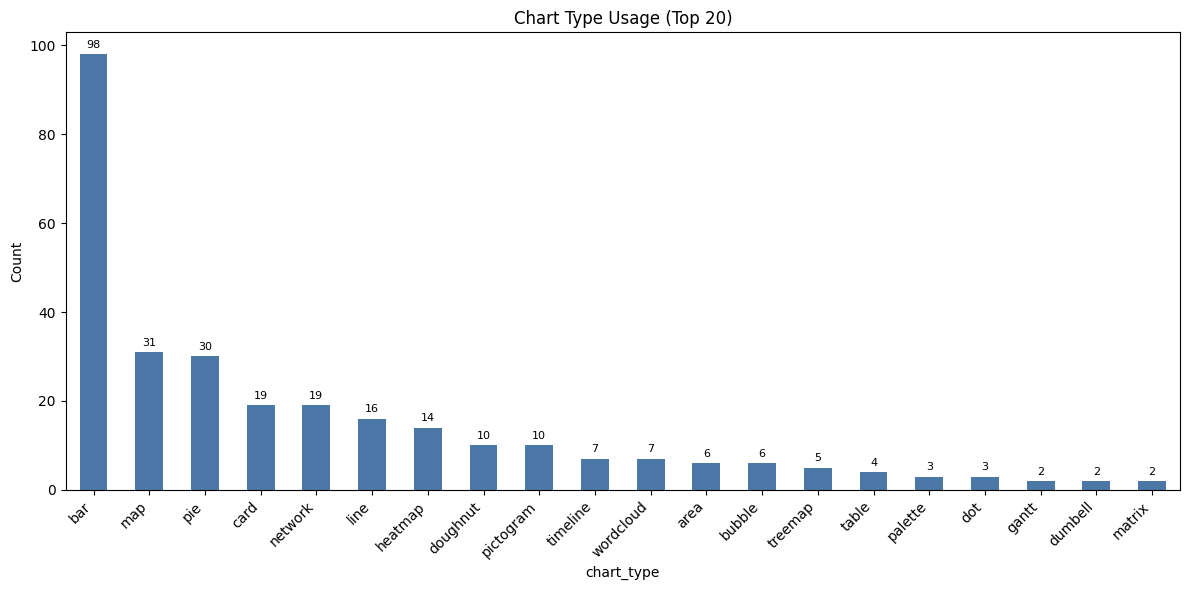

In [4]:
import matplotlib.pyplot as plt

ws = pd.read_csv('website_structure_with_interactions.csv', encoding='utf-8-sig')

ct = ws['chart_type'].dropna().astype(str).str.strip().str.lower()
counts = ct.value_counts()
share = (counts / counts.sum() * 100).round(1)

display(pd.DataFrame({'count': counts, 'percent': share}))

topN = counts.head(20).sort_values(ascending=False)
ax = topN.plot(
    kind='bar',
    figsize=(0.5*len(topN)+2, 6),
    color='#4C78A8'
)

# Add chart title and labels
ax.set_title('Chart Type Usage (Top 20)')
ax.set_xlabel('chart_type')
ax.set_ylabel('Count')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Add count labels above each bar
for i, v in enumerate(topN.values):
    ax.text(i, v + max(topN.values)*0.01, str(v), ha='center', va='bottom', fontsize=8)

# Adjust layout to prevent clipping
plt.tight_layout()

# Save and show the chart
plt.savefig('imgs/chart_type_usage_top20.png')
plt.show()

In [13]:
import pandas as pd

# Load your dataset
df = pd.read_csv("website_structure_with_interactions_derived.csv")

# --- CLEAN + COUNT DATA SOURCES PER CHART ---

# Ensure the column exists; adjust the name if needed
# Split multi–source strings like "Wikidata;IMDb" into lists
def split_sources(val):
    # Handle missing values
    if pd.isna(val):
        return []
    # Split on semicolon and remove extra spaces
    return [s.strip() for s in val.split(";") if s.strip()]

df["data_source_list"] = df["data_source"].apply(split_sources)

# Count how many sources each chart has
df["data_source_count"] = df["data_source_list"].apply(len)


# If you want the count *per chart*, not per row, group by chart_id
if "chart_id" in df.columns:
    source_counts = (
        df.groupby("chart_id")["data_source_list"]
        .apply(lambda lists: len(set(sum(lists, []))))  # unique sources per chart
        .reset_index()
        .rename(columns={"data_source_list": "data_source_count_chart"})
    )

    # Merge back into main DataFrame
    df = df.merge(source_counts, on="chart_id", how="left")

# Save the result
df.to_csv("processed_dataset.csv", index=False)


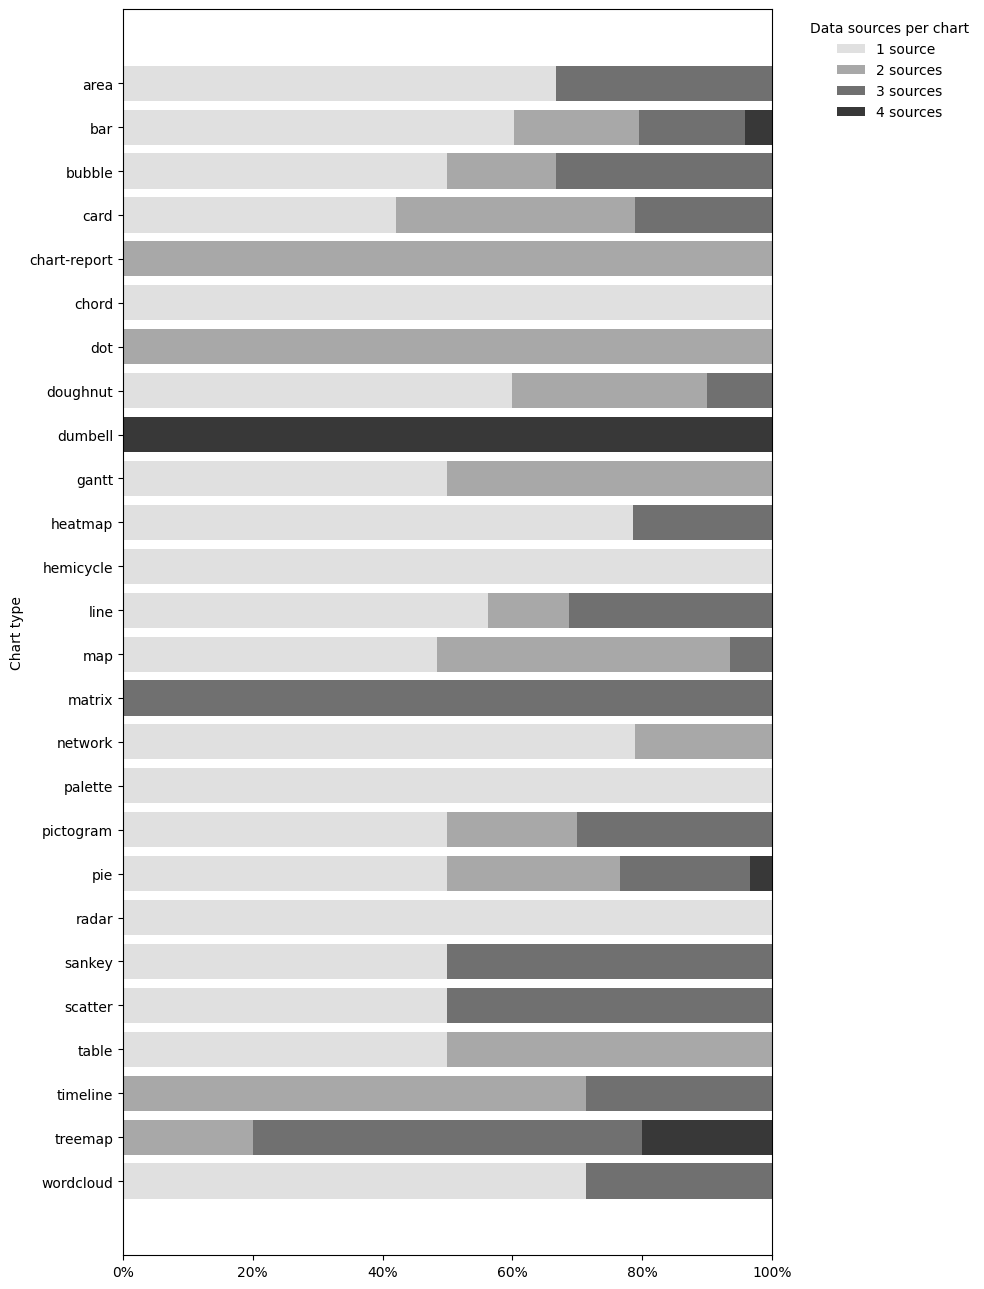

In [ ]:
# Stacked horizontal bar chart in grayscale (no black or white), scaled to percentages.
# - Reads the previously saved 'processed_dataset.csv' (must contain data_source_count)
# - Rebuilds the pivot table (chart_type x data_source_count)
# - Converts counts to percentages within each chart_type
# - Plots a horizontal stacked bar chart where darker shades correspond to higher data_source_count

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# -----------------------------
# Load & aggregate
# -----------------------------
df = pd.read_csv("processed_dataset.csv")

# Keep only rows that correspond to charts (i.e., have a chart_type)
charts = df.dropna(subset=["chart_type"]).copy()

# Count charts for each (chart_type, data_source_count)
agg = charts.groupby(["chart_type", "data_source_count"]).size().reset_index(name="n_charts")

# Pivot to wide form for plotting
pivot = agg.pivot(index="chart_type", columns="data_source_count", values="n_charts").fillna(0)
pivot.index = pivot.index.astype(str).str.strip()
pivot = pivot.sort_index(key=lambda s: s.str.casefold())

# -----------------------------
# Convert to percentages per chart_type
# -----------------------------
row_sums = pivot.sum(axis=1).replace(0, np.nan)  # avoid division by zero
pivot_pct = pivot.div(row_sums, axis=0).fillna(0)  # proportions in [0,1]

# Ensure columns (data_source_count) are sorted ascending so darker = higher
pivot_pct = pivot_pct.reindex(sorted(pivot_pct.columns), axis=1)

# -----------------------------
# Build grayscale palette (avoid white=1.0 and black=0.0)
# - Lightest gray ~ 0.88
# - Darkest gray ~ 0.22
# - Number of steps = number of data_source_count columns
# -----------------------------
n_levels = pivot_pct.shape[1]
# Generate grayscale values from light to dark
gray_values = np.linspace(0.88, 0.22, n_levels)
# Map each column to a gray shade (ascending count -> lighter; higher count -> darker)
colors = [str(g) for g in gray_values]  # matplotlib accepts grayscale strings like "0.5"

# -----------------------------
# Plot: horizontal stacked bars in percentages
# -----------------------------
fig, ax = plt.subplots(figsize=(10, max(3, 0.5 * len(pivot_pct))))

# Start the cumulative left offset at zero for each bar (chart_type)
left = np.zeros(len(pivot_pct), dtype=float)

# Plot each data_source_count column as a stack segment
for idx, (col, color) in enumerate(zip(pivot_pct.columns, colors)):
    values = pivot_pct[col].values  # proportions in [0,1]
    ax.barh(
        pivot_pct.index,
        values,
        left=left,
        label=f"{int(col)} source" if int(col) == 1 else f"{int(col)} sources",
        color=color,
        edgecolor="none"
    )
    # Update the cumulative left offset
    left += values

# -----------------------------
# Style the chart
# -----------------------------
ax.set_ylabel("Chart type")

# Format x-axis as percent
ax.xaxis.set_major_formatter(PercentFormatter(xmax=1.0))

# Set x-limits to [0, 1] for 0%..100%
ax.set_xlim(0, 1)

# Add legend outside the plot area, ordered from 1..N (already in ascending order)
legend = ax.legend(title="Data sources per chart", bbox_to_anchor=(1.04, 1), loc="upper left", frameon=False)

# Tidy layout
plt.tight_layout()
ax.invert_yaxis()


C:\Users\giuli\AppData\Local\Temp\ipykernel_16124\4060605241.py:79: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(


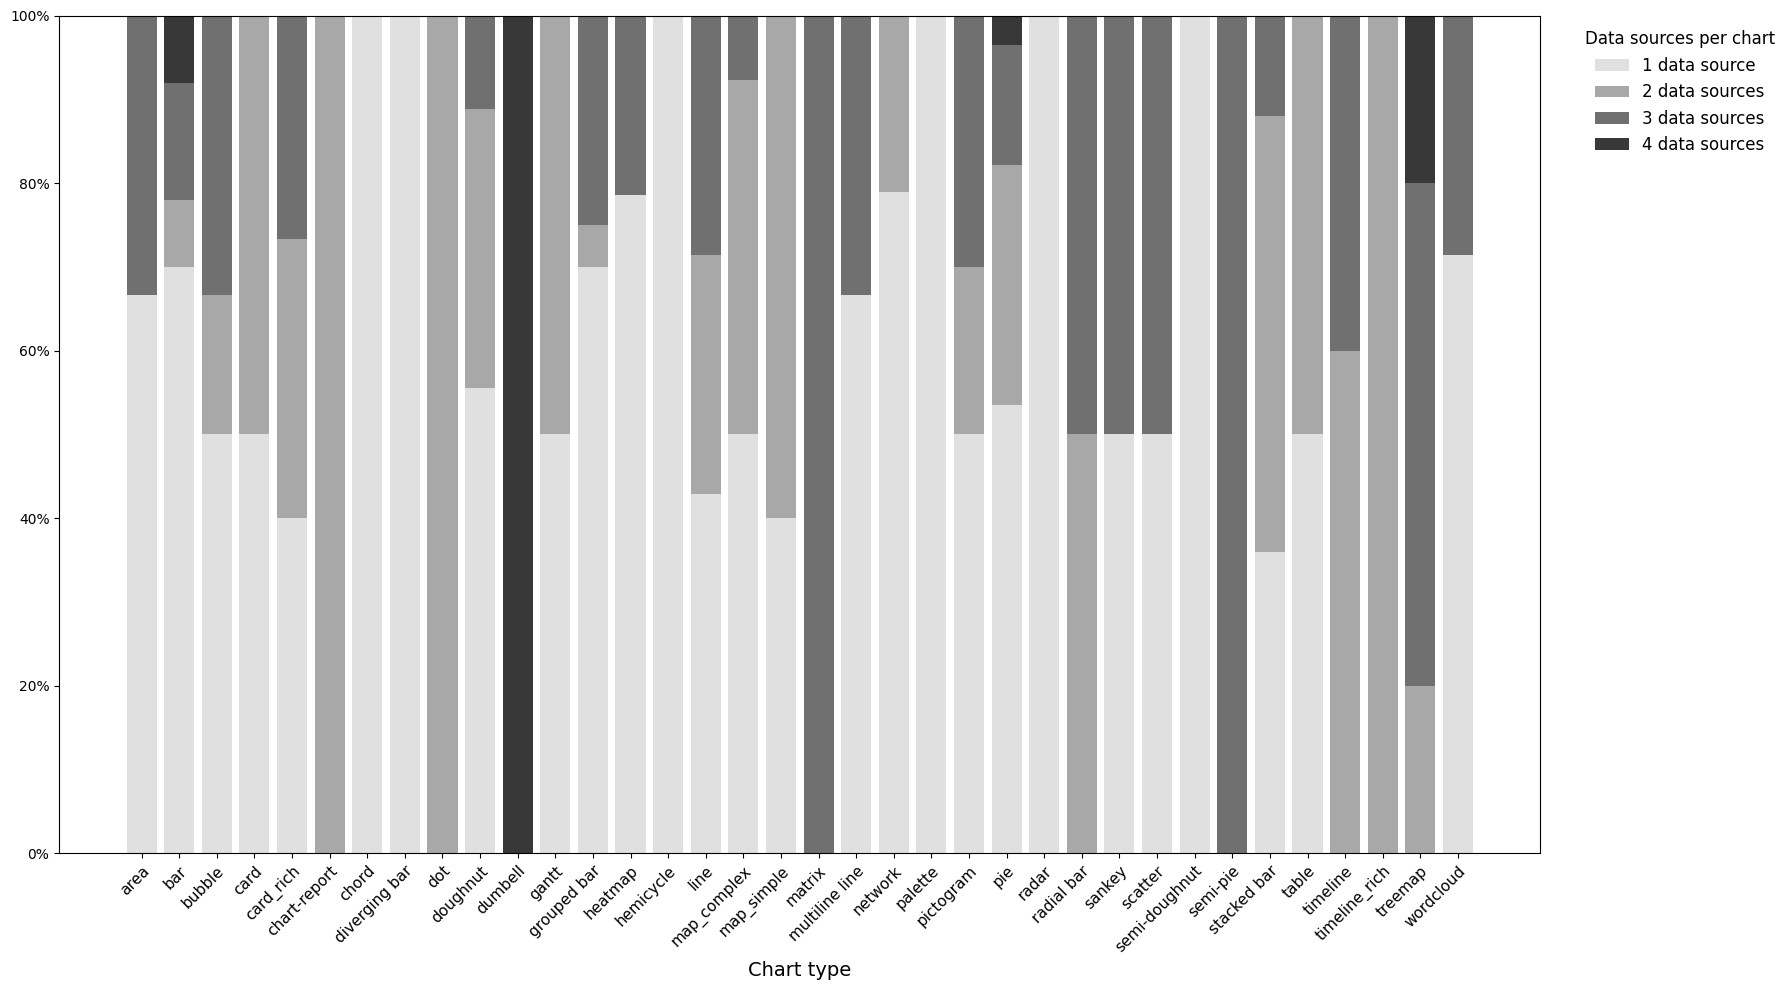

In [36]:
# Stacked vertical bar chart in grayscale (no black or white), scaled to percentages.
# - Reads the previously saved 'processed_dataset.csv' (must contain data_source_count)
# - Rebuilds the pivot table (chart_type x data_source_count)
# - Converts counts to percentages within each chart_type
# - Plots a vertical stacked bar chart where darker shades correspond to higher data_source_count

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# -----------------------------
# Load & aggregate
# -----------------------------
df = pd.read_csv("processed_dataset.csv")

# Keep only rows that correspond to charts (i.e., have a chart_type)
charts = df.dropna(subset=["chart_type_derived"]).copy()

# Count charts for each (chart_type, data_source_count)
agg = charts.groupby(["chart_type_derived", "data_source_count"]).size().reset_index(name="n_charts")

# Pivot to wide form for plotting
pivot = agg.pivot(index="chart_type_derived", columns="data_source_count", values="n_charts").fillna(0)

# -----------------------------
# Convert to percentages per chart_type
# -----------------------------
row_sums = pivot.sum(axis=1).replace(0, np.nan)  # avoid division by zero
pivot_pct = pivot.div(row_sums, axis=0).fillna(0)  # proportions in [0,1]

# Ensure columns (data_source_count) are sorted ascending so darker = higher
pivot_pct = pivot_pct.reindex(sorted(pivot_pct.columns), axis=1)

# -----------------------------
# Build grayscale palette (avoid white=1.0 and black=0.0)
# - Lightest gray ~ 0.88
# - Darkest gray ~ 0.22
# - Number of steps = number of data_source_count columns
# -----------------------------
n_levels = pivot_pct.shape[1]
# Generate grayscale values from light to dark
gray_values = np.linspace(0.88, 0.22, n_levels)
# Map each column to a gray shade (ascending count -> lighter; higher count -> darker)
colors = [str(g) for g in gray_values]  # matplotlib accepts grayscale strings like "0.5"

# --------------------------------
# Plot: vertical stacked bars (bigger + readable labels)
# --------------------------------

# Increase figure size so labels have room
fig, ax = plt.subplots(figsize=(18, 10))  # wider and taller for readability

bottom = np.zeros(len(pivot_pct), dtype=float)

# Plot each data_source_count as stacked vertical bar segments
for col, color in zip(pivot_pct.columns, colors):
    values = pivot_pct[col].values
    ax.bar(
        pivot_pct.index,
        values,
        bottom=bottom,
        label=f"{int(col)} data source" if int(col) == 1 else f"{int(col)} data sources",
        color=color,
        edgecolor="none"
    )
    bottom += values

# --------------------------------
# Style adjustments
# --------------------------------
ax.set_xlabel("Chart type", fontsize=14)

# Percentage formatting
ax.yaxis.set_major_formatter(PercentFormatter(xmax=1.0))
ax.set_ylim(0, 1)

# Rotate x labels and wrap long text
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,             # tilt them
    ha="right",              # align properly
    fontsize=11,             # make them readable
    wrap=True                # allow label wrapping
)

# Add some space below the labels
plt.subplots_adjust(bottom=0.3)

# Legend outside plot
ax.legend(
    title="Data sources per chart",
    bbox_to_anchor=(1.02, 1),
    loc="upper left",
    frameon=False,
    fontsize=12,
    title_fontsize=12
)

plt.tight_layout()
plt.savefig('imgs/chart_type_data_source_count_stacked_vertical.png')
plt.show()


In [38]:
import pandas as pd
import numpy as np
import re

df = pd.read_csv("website_structure_with_interactions_derived.csv")

# ------------------------------------
# Keep only rows that are actual charts
# ------------------------------------
charts = df.dropna(subset=["chart_type_derived"]).copy()

# ------------------------------------
# Clean and split sources
# ------------------------------------
def clean_source_name(raw):
    s = str(raw).strip()
    return re.split(r"\(", s, maxsplit=1)[0].strip()

charts["sources_list"] = (
    charts["data_source"].fillna("").apply(
        lambda s: sorted({
            clean_source_name(x.strip())
            for x in str(s).split(";")
            if x.strip()
        })
    )
)

# ------------------------------------
# Explode to one row per (chart, source)
# ------------------------------------
df_long = (
    charts.explode("sources_list")
          .rename(columns={"sources_list": "source"})
          .dropna(subset=["source"])
)

# -----------------------------
# Count number of charts using each source per chart type
# -----------------------------
tmp = (
    df_long.groupby(["chart_type_derived", "source"])
           .size()
           .reset_index(name="n_charts")
)

tmp["pct_expanded"] = tmp["n_charts"] / tmp.groupby("chart_type_derived")["n_charts"].transform("sum") * 100

total_charts = charts["chart_type_derived"].value_counts().to_dict()

tmp["pct_unique"] = tmp.apply(
    lambda row: row["n_charts"] / total_charts[row["chart_type_derived"]] * 100,
    axis=1
)


tmp.head()

,chart_type_derived,source,n_charts,pct_expanded,pct_unique
0,area,ARTchives,1,10.0,16.666667
1,area,Amazon Prime,3,30.0,50.000000
2,area,Dictionary of Art Historians,1,10.0,16.666667
3,area,Netflix,3,30.0,50.000000
4,area,Wikidata,2,20.0,33.333333


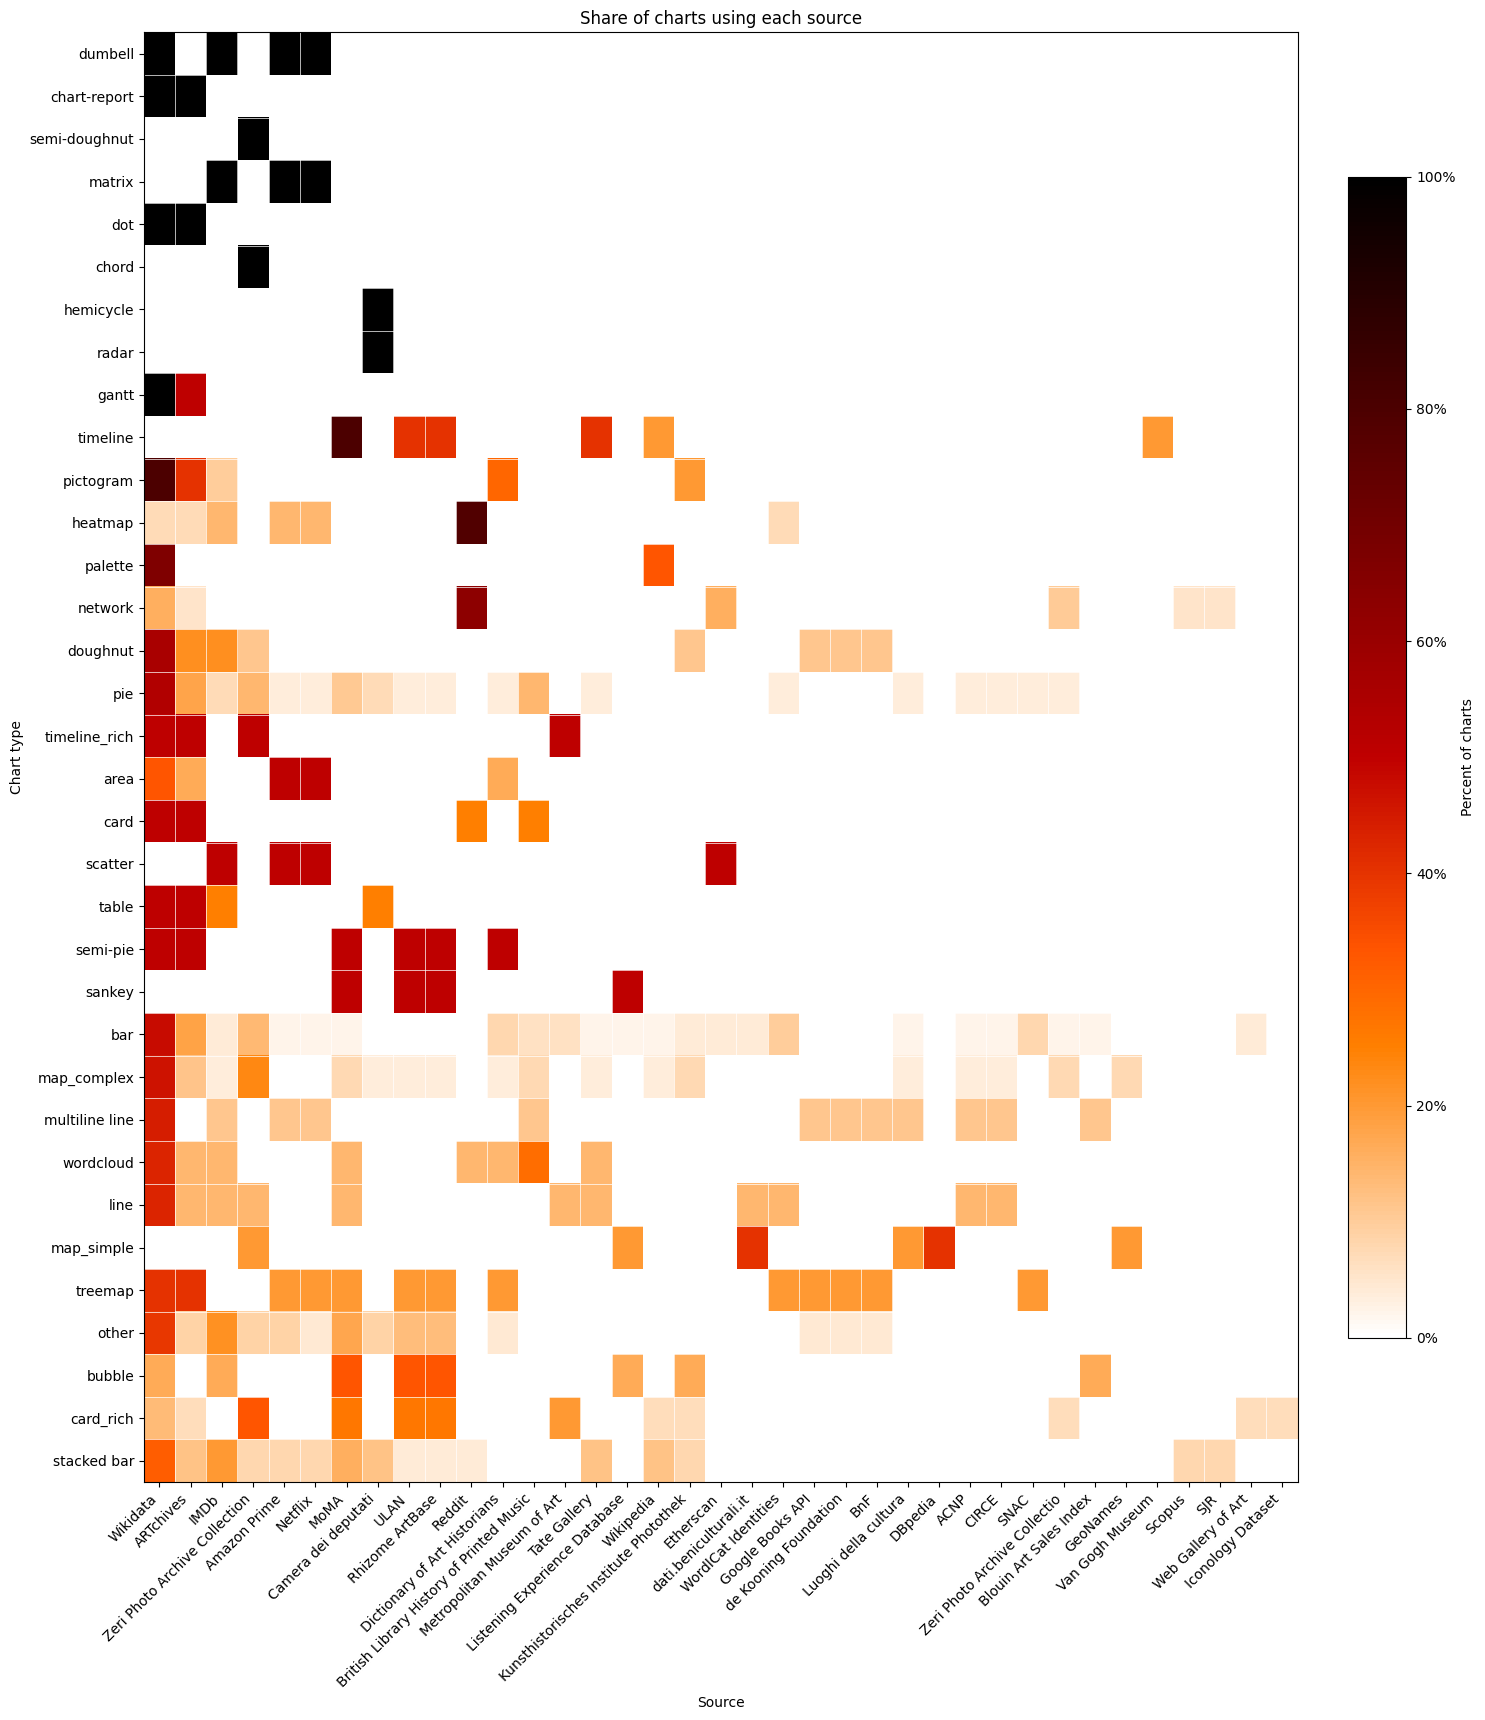

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# ---------------------------------------------------
# 1) Pivot to matrix: rows=chart type, cols=source, vals=% of charts using source
# ---------------------------------------------------
heat = (
    tmp.pivot(index="chart_type_derived", columns="source", values="pct_unique")
       .fillna(0.0)                      # no usage -> 0%
)

# Optional: order sources by overall prevalence across all chart types (descending)
col_order = heat.mean(axis=0).sort_values(ascending=False).index
heat = heat[col_order]

# Optional: order chart types by their max % (descending) for a nicer structure
row_order = heat.max(axis=1).sort_values(ascending=False).index
heat = heat.loc[row_order]

# ---------------------------------------------------
# 2) Plot with matplotlib (no seaborn)
# ---------------------------------------------------
# Figure size that scales with matrix size (cap to something reasonable)
h, w = heat.shape
fig_w = min(2 + 0.35 * w, 24)   # widen with #sources
fig_h = min(2 + 0.45 * h, 18)   # height with #chart types
fig, ax = plt.subplots(figsize=(fig_w, fig_h))

# Show heatmap; values are percentages (0..100)
im = ax.imshow(heat.values, aspect="auto", cmap="gist_heat_r", vmin=0, vmax=100)

# Axis ticks & labels
ax.set_xticks(np.arange(w))
ax.set_yticks(np.arange(h))
ax.set_xticklabels(heat.columns, rotation=45, ha="right")
ax.set_yticklabels(heat.index)

# Gridlines for readability
ax.set_xticks(np.arange(-0.5, w, 1), minor=True)
ax.set_yticks(np.arange(-0.5, h, 1), minor=True)
ax.grid(which="minor", color="w", linewidth=0.5)
ax.tick_params(which="minor", bottom=False, left=False)

ax.set_xlabel("Source")
ax.set_ylabel("Chart type")
ax.set_title("Share of charts using each source")

# Colorbar with percent formatter
cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label("Percent of charts")
cbar.ax.yaxis.set_major_formatter(PercentFormatter(xmax=100.0))

# Optional: numeric annotations on each cell (comment out if matrix is large)
# for i in range(h):
#     for j in range(w):
#         val = heat.iat[i, j]
#         if val > 0:
#             ax.text(j, i, f"{val:.0f}%", ha="center", va="center")

plt.tight_layout()
plt.savefig('imgs/heatmap_chart_type_vs_data_source.png')
plt.show()


C:\Users\giuli\AppData\Local\Temp\ipykernel_22604\635256650.py:70: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab20b", len(pct.columns))


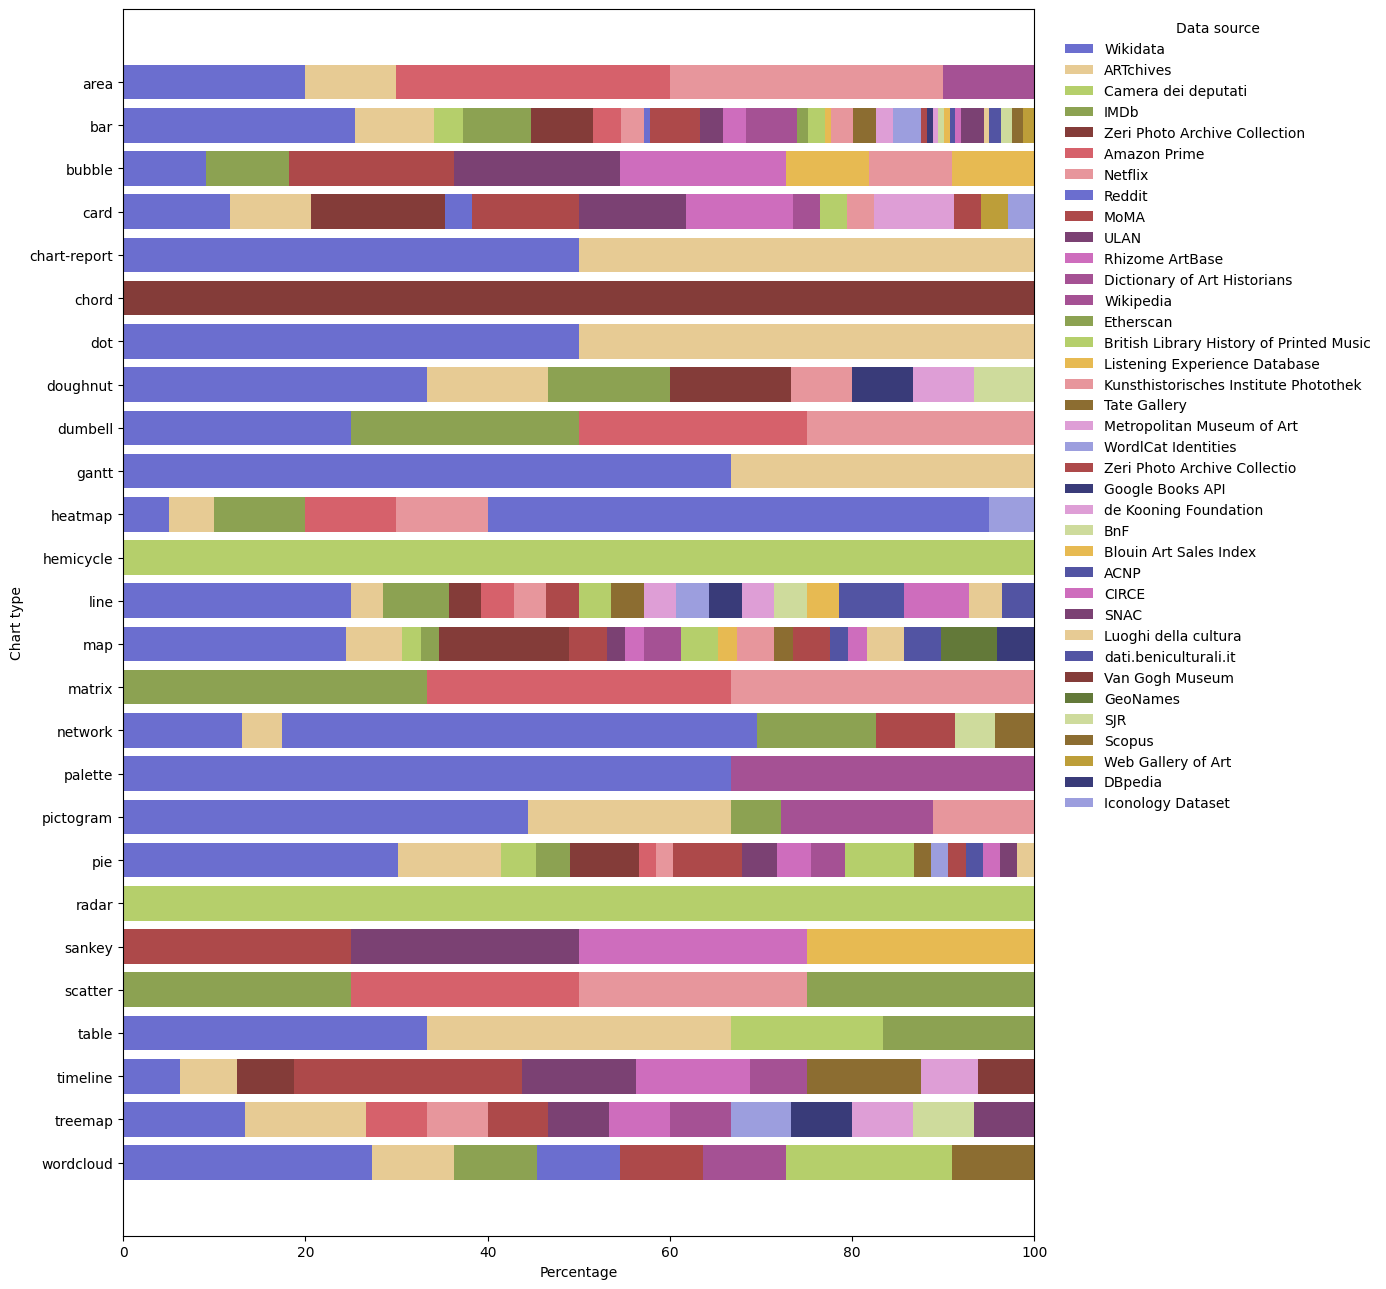

In [3]:
# Minimal pipeline: reopen CSV -> keep only "chart section" -> use chart_type + data_source
# -> stacked bar (horizontal) showing % share of each *source name* per chart type

import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# ---------- 1) Load + filter ----------
ws = pd.read_csv("processed_dataset.csv", encoding="utf-8-sig")

ws_cs = ws.loc[
    ws["type"].astype(str).str.strip().str.lower().eq("chart section")
].copy()

# Work with the two columns we need
df = ws_cs[["chart_type", "data_source"]].copy()

# Flatten chart_type in case tuples leaked in; then strip whitespace
df["chart_type"] = df["chart_type"].apply(
    lambda x: " - ".join(map(str, x)) if isinstance(x, tuple) else str(x)
).str.strip()

# ---------- 2) Clean source names ----------
def clean_source_name(raw):
    """
    Return the part before '(' if present. Examples:
    - 'MoMA(Museum of Modern Art)' -> 'MoMA'
    - 'Wikidata (Query Service)'   -> 'Wikidata'
    - 'GeoNames'                   -> 'GeoNames'
    """
    s = str(raw).strip()
    return re.split(r"\(", s, maxsplit=1)[0].strip()

# Split on ';', strip, drop empties, clean names, deduplicate within a chart
df["sources_list"] = (
    df["data_source"].fillna("").apply(
        lambda s: sorted({clean_source_name(x.strip()) for x in str(s).split(";") if x.strip()})
    )
)

# Explode to one row per (chart, source)
df_long = (
    df.explode("sources_list")
      .rename(columns={"sources_list": "source"})
      .dropna(subset=["source"])
)

# ---------- 3) Build percentage table: rows=chart_type, cols=source ----------
# Use as_index=False to avoid MultiIndex shenanigans
tmp = (
    df_long.groupby(["chart_type", "source"], as_index=False)
           .size()  # -> column "size"
)
# % within each chart_type
tmp["pct"] = tmp["size"] / tmp.groupby("chart_type")["size"].transform("sum") * 100

# Pivot to wide: chart_type × source (%)
pct = tmp.pivot(index="chart_type", columns="source", values="pct").fillna(0)

# (Optional) order sources by overall importance (stable legend & colors)
pct = pct.loc[:, pct.sum(axis=0).sort_values(ascending=False).index]

# ---------- 4) Plot: horizontal stacked bars (robust, readable) ----------
fig, ax = plt.subplots(figsize=(14, max(6, 0.5 * len(pct))))
y = np.arange(len(pct))
left = np.zeros(len(pct), dtype=float)

cmap = plt.cm.get_cmap("tab20b", len(pct.columns))
colors = [cmap(i) for i in range(len(pct.columns))]

# Shuffle colors for higher visual separation
import random
random.seed(42)   # optional reproducible randomness
random.shuffle(colors)


for col, color in zip(pct.columns, colors):
    vals = pct[col].values.astype(float)
    ax.barh(y, vals, left=left, label=col, color=color)
    left += vals

ax.set_yticks(y)
ax.set_yticklabels(pct.index.tolist())
ax.set_xlim(0, 100)
ax.set_xlabel("Percentage")
ax.set_ylabel("Chart type")
ax.legend(title="Data source", bbox_to_anchor=(1.02, 1), loc="upper left", frameon=False)

# this makes A appear at the TOP instead of bottom
ax.invert_yaxis()

plt.tight_layout()
plt.show()




    chart_type_derived                                        data_source  \
4                 line                                      Wikidata;IMDb   
4                 line                                      Wikidata;IMDb   
5          grouped bar                                      Wikidata;IMDb   
5          grouped bar                                      Wikidata;IMDb   
6          map_complex                                      Wikidata;IMDb   
..                 ...                                                ...   
487                bar  ARTchives;Wikidata;SNAC(Social Networks and Ar...   
488            treemap  ARTchives;Wikidata;SNAC(Social Networks and Ar...   
488            treemap  ARTchives;Wikidata;SNAC(Social Networks and Ar...   
488            treemap  ARTchives;Wikidata;SNAC(Social Networks and Ar...   
488            treemap  ARTchives;Wikidata;SNAC(Social Networks and Ar...   

      chart_type               source  
4           line                 IM

C:\Users\giuli\AppData\Local\Temp\ipykernel_22604\1016211656.py:73: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab20b", len(pct.columns))


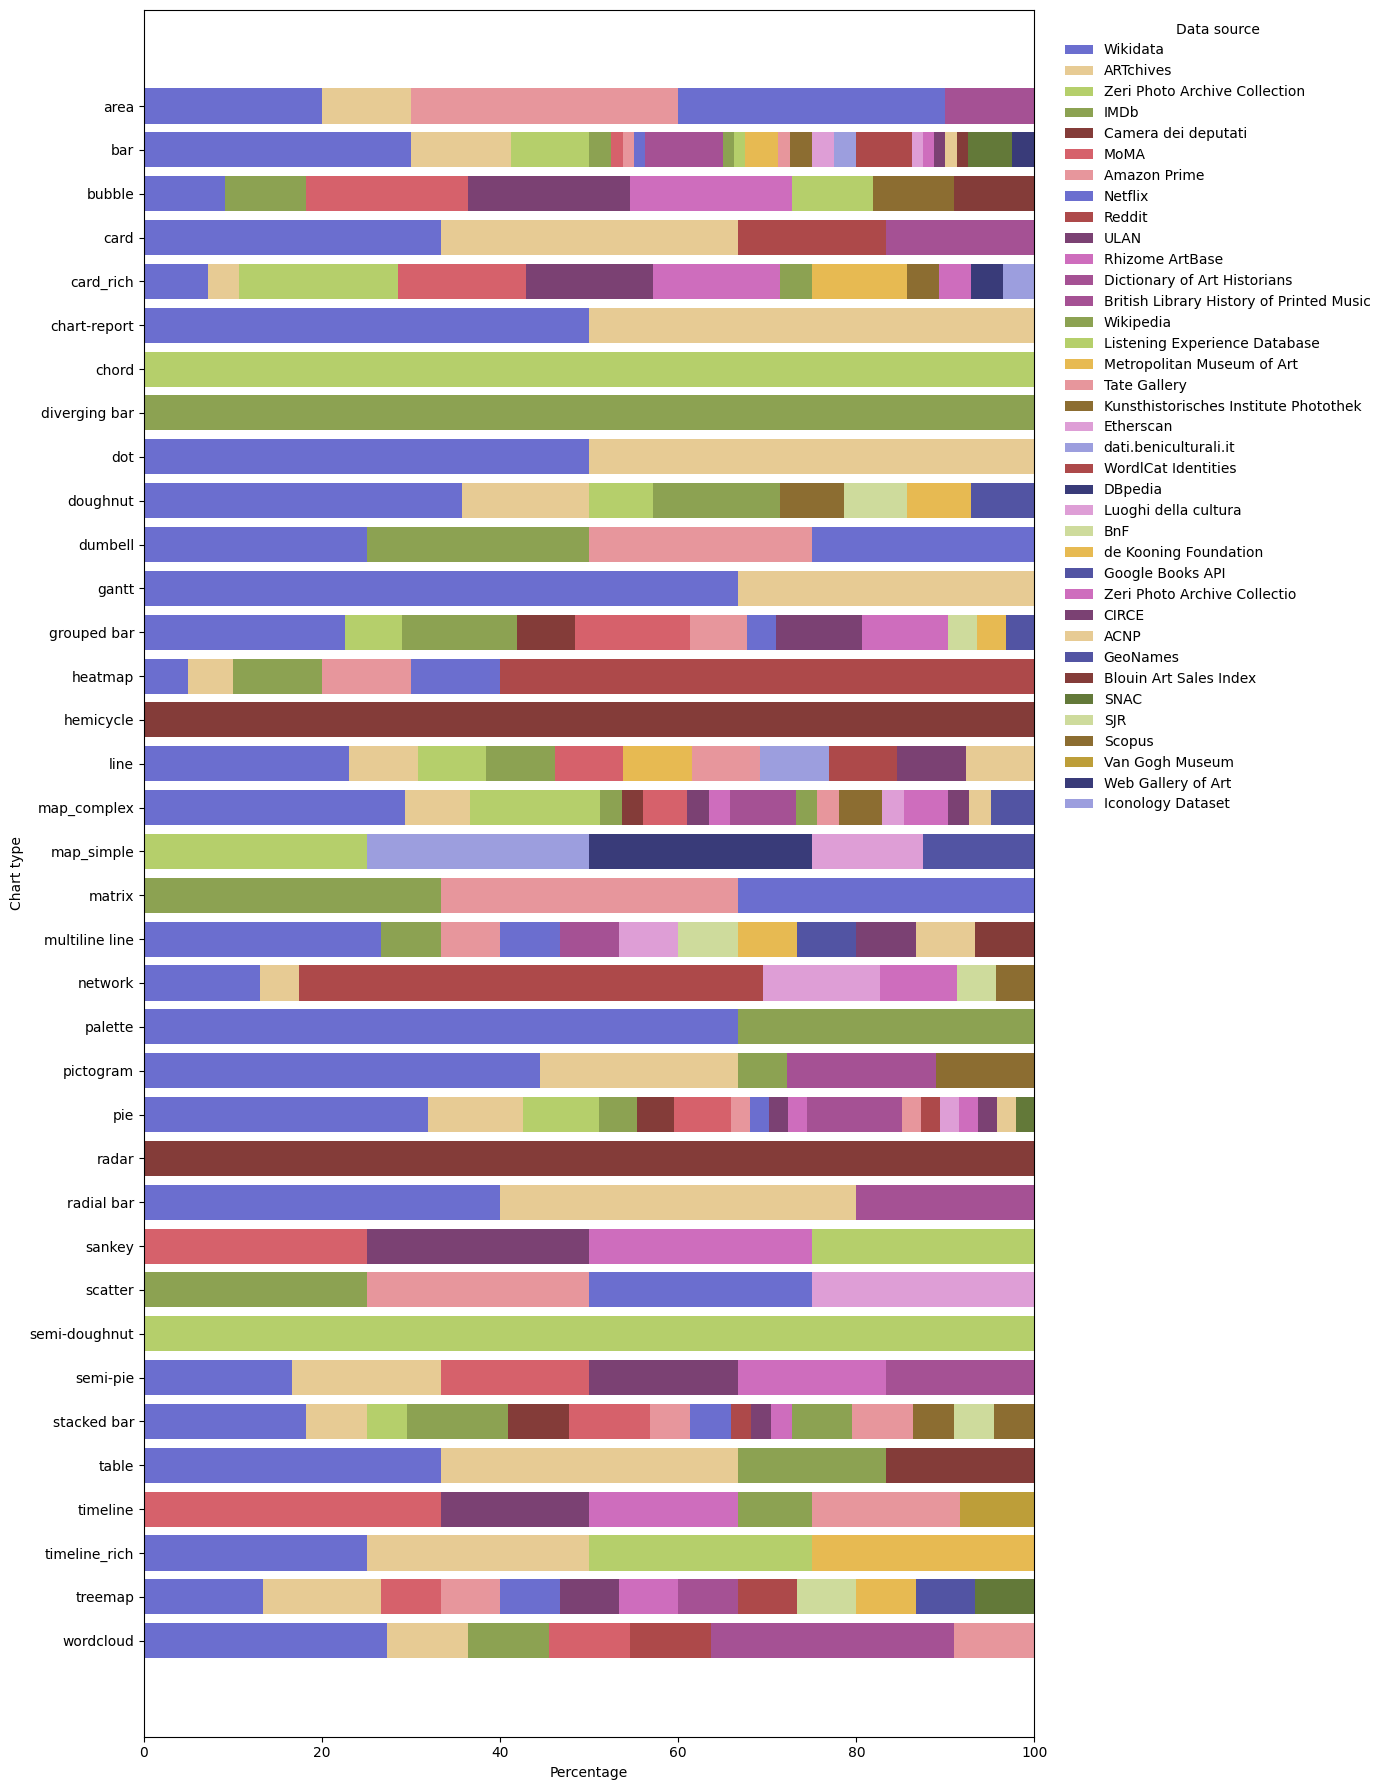

In [ ]:
# Minimal pipeline: reopen CSV -> keep only "chart section" -> use chart_type + data_source
# -> stacked bar (horizontal) showing % share of each *source name* per chart type

import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# ---------- 1) Load + filter ----------
ws = pd.read_csv("processed_dataset.csv", encoding="utf-8-sig")

ws_cs = ws.loc[
    ws["type"].astype(str).str.strip().str.lower().eq("chart section")
].copy()

# Work with the two columns we need
df = ws_cs[["chart_type_derived", "data_source"]].copy()

# Flatten chart_type in case tuples leaked in; then strip whitespace
df["chart_type"] = df["chart_type_derived"].apply(
    lambda x: " - ".join(map(str, x)) if isinstance(x, tuple) else str(x)
).str.strip()

# ---------- 2) Clean source names ----------
def clean_source_name(raw):
    """
    Return the part before '(' if present. Examples:
    - 'MoMA(Museum of Modern Art)' -> 'MoMA'
    """
    s = str(raw).strip()
    return re.split(r"\(", s, maxsplit=1)[0].strip()

# Split on ';', strip, drop empties, clean names, deduplicate within a chart
df["sources_list"] = (
    df["data_source"].fillna("").apply(
        lambda s: sorted({clean_source_name(x.strip()) for x in str(s).split(";") if x.strip()})
    )
)


# Explode to one row per (chart, source)
df_long = (
    df.explode("sources_list")
      .rename(columns={"sources_list": "source"})
      .dropna(subset=["source"])
)

# ---------- 3) Build percentage table: rows=chart_type, cols=source ----------
# Use as_index=False to avoid MultiIndex shenanigans
tmp = (
    df_long.groupby(["chart_type_derived", "source"], as_index=False)
           .size()  # -> column "size"
)
# % within each chart_type
tmp["pct"] = tmp["size"] / tmp.groupby("chart_type_derived")["size"].transform("sum") * 100

# Pivot to wide: chart_type × source (%)
pct = tmp.pivot(index="chart_type_derived", columns="source", values="pct").fillna(0)

# (Optional) order sources by overall importance (stable legend & colors)
pct = pct.loc[:, pct.sum(axis=0).sort_values(ascending=False).index]

# ---------- 4) Plot: horizontal stacked bars (robust, readable) ----------
fig, ax = plt.subplots(figsize=(14, max(6, 0.5 * len(pct))))
y = np.arange(len(pct))
left = np.zeros(len(pct), dtype=float)

cmap = plt.cm.get_cmap("tab20b", len(pct.columns))
colors = [cmap(i) for i in range(len(pct.columns))]

# Shuffle colors for higher visual separation
import random
random.seed(42)   # optional reproducible randomness
random.shuffle(colors)


for col, color in zip(pct.columns, colors):
    vals = pct[col].values.astype(float)
    ax.barh(y, vals, left=left, label=col, color=color)
    left += vals

ax.set_yticks(y)
ax.set_yticklabels(pct.index.tolist())
ax.set_xlim(0, 100)
ax.set_xlabel("Percentage")
ax.set_ylabel("Chart type")
ax.legend(title="Data source", bbox_to_anchor=(1.02, 1), loc="upper left", frameon=False)

# this makes A appear at the TOP instead of bottom
ax.invert_yaxis()

plt.tight_layout()
plt.show()




C:\Users\giuli\AppData\Local\Temp\ipykernel_11552\1817450173.py:77: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab20b", len(pct.columns))


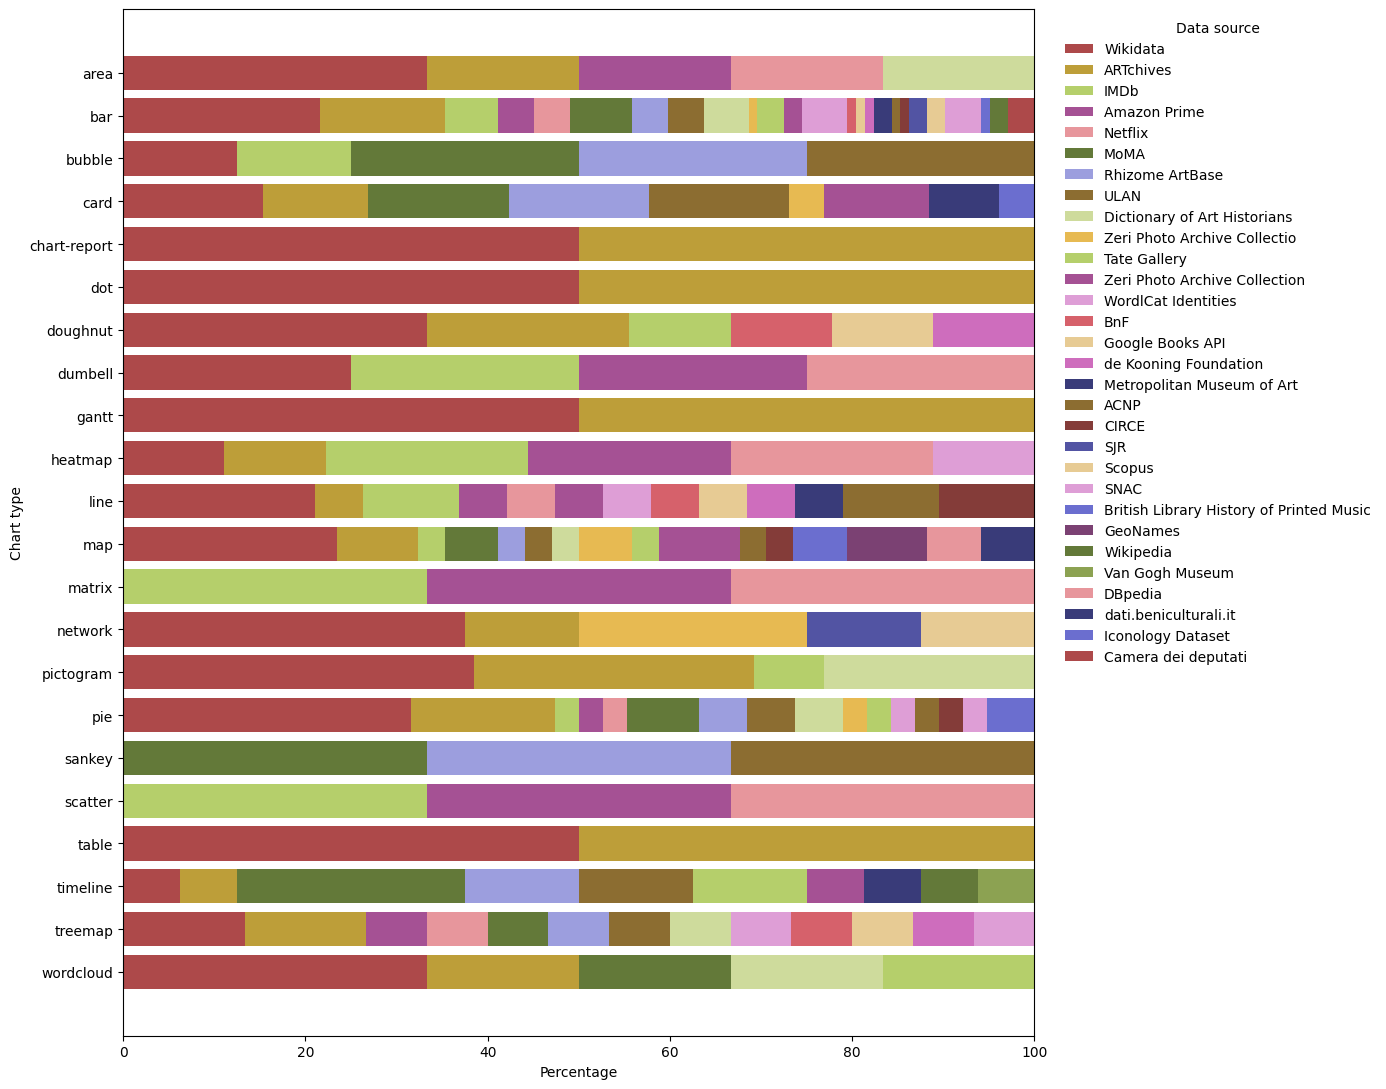

In [92]:
# Minimal pipeline: reopen CSV -> keep only "chart section"
# -> BUT ONLY those with data_source_count > 1
# -> stacked bar (horizontal) showing % share of each *source name* per chart type

import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---------- 1) Load + filter ----------
ws = pd.read_csv("processed_dataset.csv", encoding="utf-8-sig")

# Keep only chart sections
ws_cs = ws.loc[
    ws["type"].astype(str).str.strip().str.lower().eq("chart section")
].copy()

# 🔥 NEW: keep only rows where the chart uses more than one data source
ws_cs = ws_cs.loc[ws_cs["data_source_count"] > 1].copy()

# Work with the two columns we need
df = ws_cs[["chart_type", "data_source"]].copy()

# Flatten chart_type in case tuples leaked in; then strip whitespace
df["chart_type"] = df["chart_type"].apply(
    lambda x: " - ".join(map(str, x)) if isinstance(x, tuple) else str(x)
).str.strip()

# ---------- 2) Clean source names ----------
def clean_source_name(raw):
    """
    Return the part before '(' if present. Examples:
    - 'MoMA(Museum of Modern Art)' -> 'MoMA'
    - 'Wikidata (Query Service)'   -> 'Wikidata'
    - 'GeoNames'                   -> 'GeoNames'
    """
    s = str(raw).strip()
    return re.split(r"\(", s, maxsplit=1)[0].strip()

# Split on ';', strip, drop empties, clean names, deduplicate within a chart
df["sources_list"] = (
    df["data_source"].fillna("").apply(
        lambda s: sorted({clean_source_name(x.strip()) for x in str(s).split(";") if x.strip()})
    )
)

# Explode to one row per (chart, source)
df_long = (
    df.explode("sources_list")
      .rename(columns={"sources_list": "source"})
      .dropna(subset=["source"])
)

# ---------- 3) Build percentage table: rows=chart_type, cols=source ----------
tmp = (
    df_long.groupby(["chart_type", "source"], as_index=False)
           .size()
)

tmp["pct"] = tmp["size"] / tmp.groupby("chart_type")["size"].transform("sum") * 100

pct = tmp.pivot(index="chart_type", columns="source", values="pct").fillna(0)

# order columns by total importance
pct = pct.loc[:, pct.sum(axis=0).sort_values(ascending=False).index]

# ---------- 4) Plot: horizontal stacked bars, many colors, alphabetical y-axis ----------

# Alphabetical order for chart_type (y-axis)
pct = pct.sort_index(key=lambda s: s.str.casefold())

fig, ax = plt.subplots(figsize=(14, max(6, 0.5 * len(pct))))
y = np.arange(len(pct))
left = np.zeros(len(pct), dtype=float)

# many colors (example)
cmap = plt.cm.get_cmap("tab20b", len(pct.columns))
colors = [cmap(i) for i in range(len(pct.columns))]

# Shuffle colors for higher visual separation
import random
random.seed(42)   # optional reproducible randomness
random.shuffle(colors)


for col, color in zip(pct.columns, colors):
    vals = pct[col].values.astype(float)
    ax.barh(y, vals, left=left, label=col, color=color)
    left += vals

ax.set_yticks(y)
ax.set_yticklabels(pct.index.tolist())
ax.set_xlim(0, 100)
ax.set_xlabel("Percentage")
ax.set_ylabel("Chart type")
ax.legend(title="Data source", bbox_to_anchor=(1.02, 1), loc="upper left", frameon=False)

# 🔑 this makes A appear at the TOP instead of bottom
ax.invert_yaxis()

plt.tight_layout()
plt.show()

plt.show()



source               Wikidata  ARTchives       IMDb       MoMA  Amazon Prime  \
chart_type_derived                                                             
area                33.333333  16.666667   0.000000   0.000000     16.666667   
bar                 28.888889  20.000000   0.000000   0.000000      2.222222   
bubble              12.500000   0.000000  12.500000  25.000000      0.000000   
card                50.000000  50.000000   0.000000   0.000000      0.000000   
card_rich            9.090909   4.545455   0.000000  18.181818      0.000000   
chart-report        50.000000  50.000000   0.000000   0.000000      0.000000   
dot                 50.000000  50.000000   0.000000   0.000000      0.000000   
doughnut            33.333333  22.222222  11.111111   0.000000      0.000000   
dumbell             25.000000   0.000000  25.000000   0.000000     25.000000   
gantt               50.000000  50.000000   0.000000   0.000000      0.000000   
grouped bar          5.882353   0.000000

C:\Users\giuli\AppData\Local\Temp\ipykernel_11552\1607072891.py:78: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab20b", len(pct.columns))


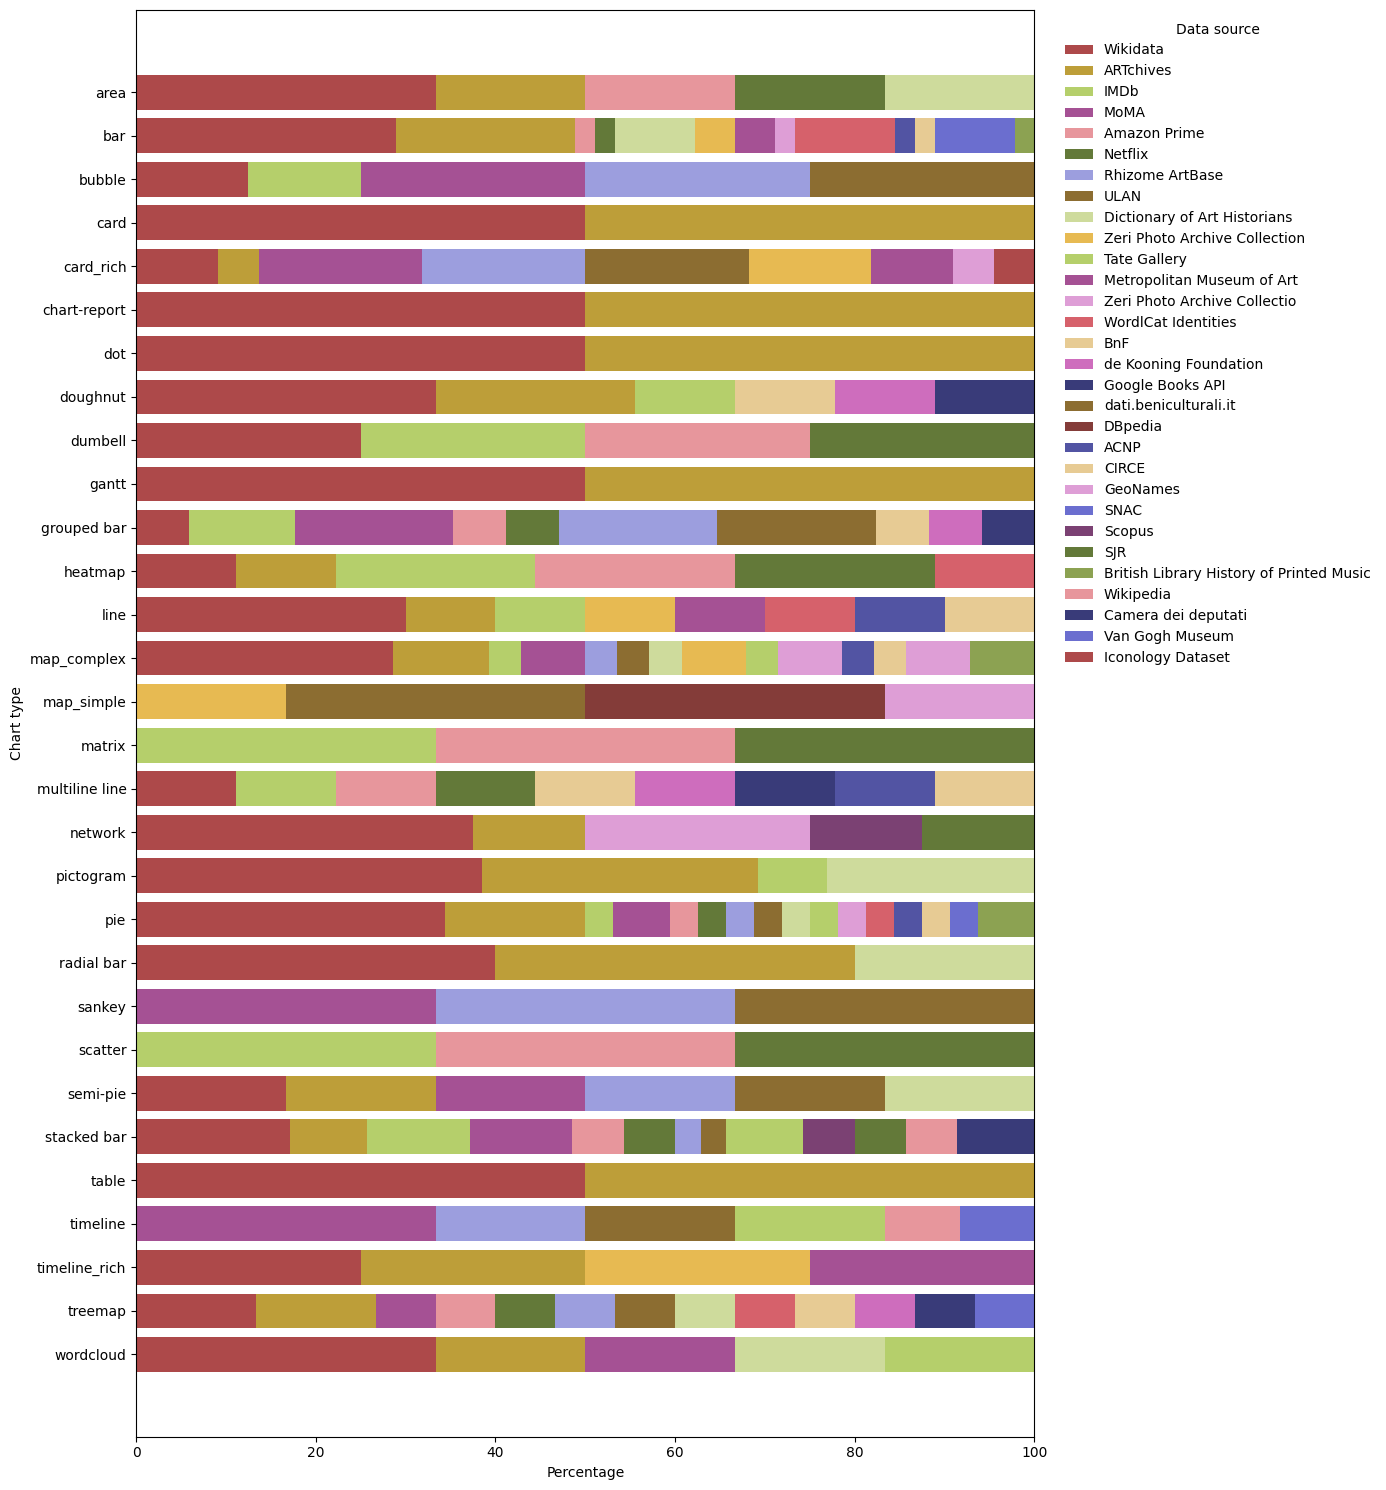

In [96]:
# Minimal pipeline: reopen CSV -> keep only "chart section"
# -> BUT ONLY those with data_source_count > 1
# -> stacked bar (horizontal) showing % share of each *source name* per chart type

import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---------- 1) Load + filter ----------
ws = pd.read_csv("processed_dataset.csv", encoding="utf-8-sig")

# Keep only chart sections
ws_cs = ws.loc[
    ws["type"].astype(str).str.strip().str.lower().eq("chart section")
].copy()

# 🔥 NEW: keep only rows where the chart uses more than one data source
ws_cs = ws_cs.loc[ws_cs["data_source_count"] > 1].copy()

# Work with the two columns we need
df = ws_cs[["chart_type_derived", "data_source"]].copy()

# Flatten chart_type in case tuples leaked in; then strip whitespace
df["chart_type"] = df["chart_type_derived"].apply(
    lambda x: " - ".join(map(str, x)) if isinstance(x, tuple) else str(x)
).str.strip()

# ---------- 2) Clean source names ----------
def clean_source_name(raw):
    """
    Return the part before '(' if present. Examples:
    - 'MoMA(Museum of Modern Art)' -> 'MoMA'
    - 'Wikidata (Query Service)'   -> 'Wikidata'
    - 'GeoNames'                   -> 'GeoNames'
    """
    s = str(raw).strip()
    return re.split(r"\(", s, maxsplit=1)[0].strip()

# Split on ';', strip, drop empties, clean names, deduplicate within a chart
df["sources_list"] = (
    df["data_source"].fillna("").apply(
        lambda s: sorted({clean_source_name(x.strip()) for x in str(s).split(";") if x.strip()})
    )
)

# Explode to one row per (chart, source)
df_long = (
    df.explode("sources_list")
      .rename(columns={"sources_list": "source"})
      .dropna(subset=["source"])
)

# ---------- 3) Build percentage table: rows=chart_type, cols=source ----------
tmp = (
    df_long.groupby(["chart_type_derived", "source"], as_index=False)
           .size()
)

tmp["pct"] = tmp["size"] / tmp.groupby("chart_type_derived")["size"].transform("sum") * 100

pct = tmp.pivot(index="chart_type_derived", columns="source", values="pct").fillna(0)

# order columns by total importance
pct = pct.loc[:, pct.sum(axis=0).sort_values(ascending=False).index]

# ---------- 4) Plot: horizontal stacked bars, many colors, alphabetical y-axis ----------

# Alphabetical order for chart_type (y-axis)
pct = pct.sort_index(key=lambda s: s.str.casefold())
print(pct)

fig, ax = plt.subplots(figsize=(14, max(6, 0.5 * len(pct))))
y = np.arange(len(pct))
left = np.zeros(len(pct), dtype=float)

# many colors (example)
cmap = plt.cm.get_cmap("tab20b", len(pct.columns))
colors = [cmap(i) for i in range(len(pct.columns))]

# Shuffle colors for higher visual separation
import random
random.seed(42)   # optional reproducible randomness
random.shuffle(colors)


for col, color in zip(pct.columns, colors):
    vals = pct[col].values.astype(float)
    ax.barh(y, vals, left=left, label=col, color=color)
    left += vals

ax.set_yticks(y)
ax.set_yticklabels(pct.index.tolist())
ax.set_xlim(0, 100)
ax.set_xlabel("Percentage")
ax.set_ylabel("Chart type")
ax.legend(title="Data source", bbox_to_anchor=(1.02, 1), loc="upper left", frameon=False)

# this makes A appear at the TOP instead of bottom
ax.invert_yaxis()

plt.tight_layout()
plt.show()



,projects_using_type
chart_type,
bar,32
map,20
pie,18
card,14
line,13
doughnut,8
wordcloud,6
bubble,5
timeline,5


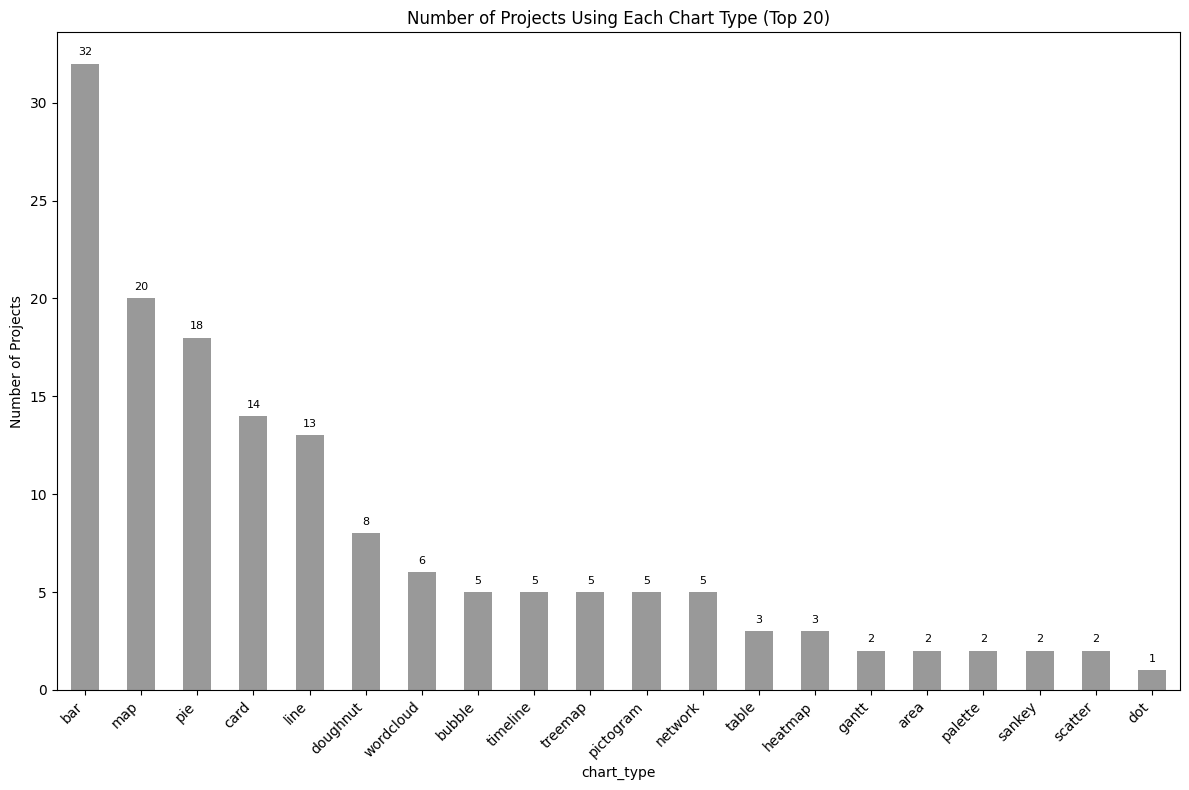

In [32]:
ws = pd.read_csv('website_structure_with_interactions.csv', encoding='utf-8-sig')

# Normalize chart_type
ws['chart_type'] = ws['chart_type'].dropna().astype(str).str.strip().str.lower()

# Group by chart_type and count distinct projects
chart_per_project = (
    ws.dropna(subset=['chart_type'])
      .groupby('chart_type')['record_index']
      .nunique()   # number of unique projects that use this chart type
      .sort_values(ascending=False)
)

# Display the data
display(chart_per_project.to_frame(name='projects_using_type'))

# Plot the top 20 chart types by number of projects
topN = chart_per_project.head(20)
ax = topN.plot(
    kind='bar',
    figsize=(12, 8),
    color='#999999'
)

# Add chart title and labels
ax.set_title('Number of Projects Using Each Chart Type (Top 20)')
ax.set_xlabel('chart_type')
ax.set_ylabel('Number of Projects')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Add count labels above each bar
for i, v in enumerate(topN.values):
    ax.text(i, v + max(topN.values)*0.01, str(v), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
# Save and show the chart
plt.savefig('imgs/chart_type_usage_project.png')
plt.show()


I have array(['multibar', 'heatmap', 'stack', 'pin', 'multiline', 'comparison', 'trendline', 'image', 'metadata', 'clusters', 'cluster', 'diverging', 'radial', 'correlation', 'semi', 'nested', 'trajectory', 'globe', 'bubble', 'text', '(none)'], dtype=object) 

- Let's ignore the "comparison" feature. 
- If there are none, we don't specify anyting. 
- In the case of the map, if there is only "pin", we consider it a simple map, if there are one or more features beyond pin, we consider it a complex map. 
- In the case of card, we consider it a rich card only if there are both image and metadata. 
- If the timeline has any feature, we consider it a rich timeline.

[✓] Saved with derived types (full dataset preserved) -> website_structure_with_interactions_derived.csv
['area', 'bar', 'bubble', 'card', 'card_rich', 'chart-report', 'chord', 'dot', 'doughnut', 'dumbell', 'gantt', 'heatmap', 'hemicycle', 'line', 'map_complex', 'map_simple', 'matrix', 'multiline line', 'network', 'other', 'palette', 'pictogram', 'pie', 'radar', 'sankey', 'scatter', 'semi-doughnut', 'semi-pie', 'stacked bar', 'table', 'timeline', 'timeline_rich', 'treemap', 'wordcloud']


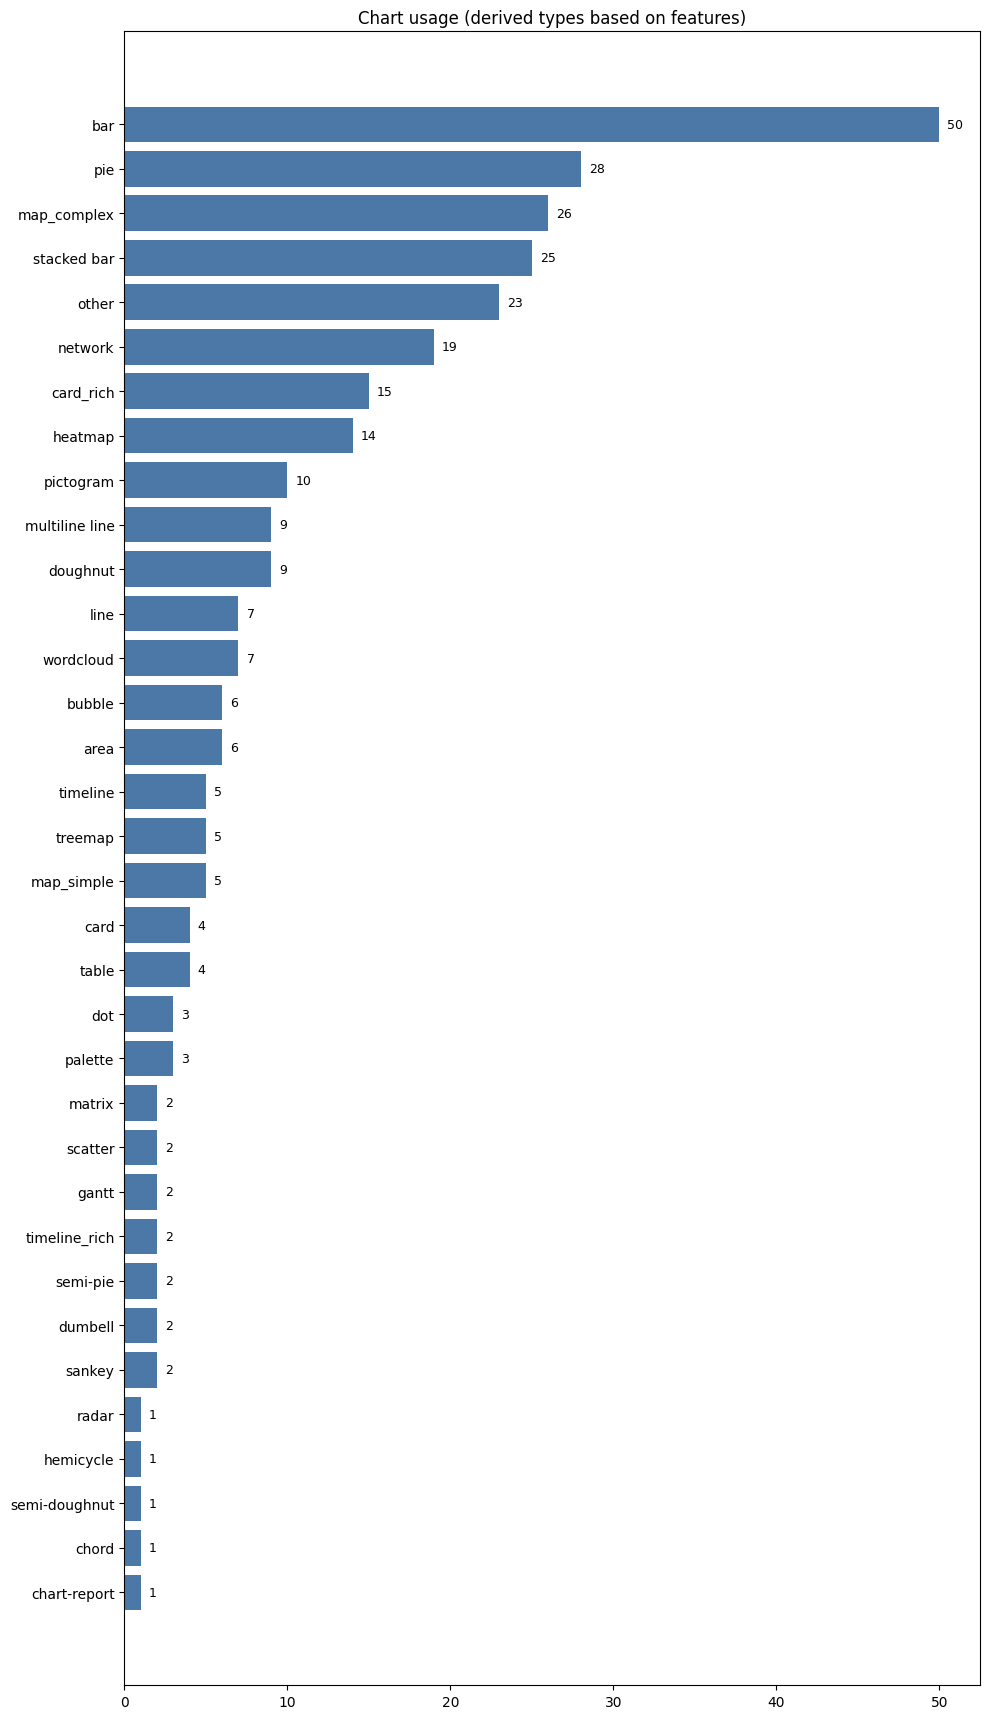

In [6]:
from pathlib import Path
import os
import pandas as pd
import matplotlib.pyplot as plt

# --- Load & normalize (in-memory only) ---
ws = read_records(Path("website_structure_with_interactions.csv"))
# Keep ONLY chart rows
# Mask for chart rows (we'll apply all logic only on these rows)
m_chart = ws["type"].astype(str).str.strip().str.lower().eq("chart section")

# --- Normalize ONLY chart rows safely ---
# Always use .loc[mask, col] so non-chart rows stay untouched
ws.loc[m_chart, "chart_type"] = (
    ws.loc[m_chart, "chart_type"].fillna("").astype(str).str.strip().str.lower()
)
ws.loc[m_chart, "chart_design_feature"] = (
    ws.loc[m_chart, "chart_design_feature"].fillna("").astype(str).str.strip().str.lower()
)

# Standardize clusters → cluster (only chart rows)
ws.loc[m_chart, "chart_design_feature"] = (
    ws.loc[m_chart, "chart_design_feature"]
      .str.replace(";clusters", ";cluster", regex=False)
      .str.replace("^clusters$", "cluster", regex=True)
)

# --- Cleaned feature list per chart row ---
def _clean_feats(s: str) -> list:
    """Split on ';', strip tokens, and drop '(none)'/'comparison'."""
    parts = [t.strip() for t in s.split(";")] if isinstance(s, str) else []
    return [t for t in parts if t and t not in {"(none)", "comparison"}]

feats = ws.loc[m_chart, "chart_design_feature"].apply(_clean_feats)

# --- Build derived display label ONLY for chart rows ---
display_label = ws.loc[m_chart, "chart_type"].copy()

# 1) MAP: simple only 'pin'; any other feature => complex
is_map = display_label.eq("map")
map_feats = feats[is_map]
display_label.loc[is_map & map_feats.apply(lambda fs: len(fs) == 1 and fs[0] == "pin")] = "map_simple"
display_label.loc[is_map & map_feats.apply(lambda fs: not (len(fs) == 1 and fs[0] == "pin"))] = "map_complex"

# 2) CARD: rich if BOTH image & metadata
is_card = display_label.eq("card")
card_feats = feats[is_card]
display_label.loc[is_card & card_feats.apply(lambda fs: ("image" in fs) and ("metadata" in fs))] = "card_rich"
display_label.loc[is_card & ~(card_feats.apply(lambda fs: ("image" in fs) and ("metadata" in fs)))] = "card"

# 3) TIMELINE: any feature => rich
is_tl = display_label.eq("timeline")
tl_feats = feats[is_tl]
display_label.loc[is_tl & tl_feats.apply(lambda fs: len(fs) > 0)] = "timeline_rich"
display_label.loc[is_tl & ~(tl_feats.apply(lambda fs: len(fs) > 0))] = "timeline"

# 4) BAR: stacked > grouped > radial > diverging
is_bar = display_label.eq("bar")
bar_feats = feats[is_bar]
display_label.loc[is_bar & bar_feats.apply(lambda fs: "stack" in fs)] = "stacked bar"
display_label.loc[is_bar & bar_feats.apply(lambda fs: ("stack" not in fs) and ("multibar" in fs))] = "other"
display_label.loc[is_bar & bar_feats.apply(lambda fs: ("stack" not in fs) and ("multibar" not in fs) and ("radial" in fs))] = "other"
display_label.loc[is_bar & bar_feats.apply(lambda fs: ("stack" not in fs) and ("multibar" not in fs) and ("radial" not in fs) and ("diverging" in fs))] = "other"

# 5) LINE: promote to multiline
is_line = display_label.eq("line")
line_feats = feats[is_line]
display_label.loc[is_line & line_feats.apply(lambda fs: "multiline" in fs)] = "multiline line"

# 6) SCATTER/DOT: bubble > scatter (trendline)
is_scatter = display_label.isin(["scatter", "dot"])
sc_feats = feats[is_scatter]
display_label.loc[is_scatter & sc_feats.apply(lambda fs: "bubble" in fs)] = "bubble chart"
display_label.loc[is_scatter & sc_feats.apply(lambda fs: ("bubble" not in fs) and ("trendline" in fs))] = "scatter (trendline)"

# 7) PIE/DOUGHNUT: semi- variants
is_pie = display_label.isin(["pie", "doughnut"])
pd_feats = feats[is_pie]
display_label.loc[is_pie & ws.loc[m_chart, "chart_type"].eq("pie") & pd_feats.apply(lambda fs: "semi" in fs)] = "semi-pie"
display_label.loc[is_pie & ws.loc[m_chart, "chart_type"].eq("doughnut") & pd_feats.apply(lambda fs: "semi" in fs)] = "semi-doughnut"

# --- Attach the derived label back to the FULL dataframe ---
# Initialize column (keeps NaN for non-chart rows)
ws["chart_type_derived"] = pd.NA
# Fill only where we computed it
ws.loc[m_chart, "chart_type_derived"] = display_label

# === SAVE: full dataset preserved ===
out_path = Path("website_structure_with_interactions_derived.csv")
ws.to_csv(out_path, index=False, encoding="utf-8-sig")
print(f"[✓] Saved with derived types (full dataset preserved) -> {out_path}")

# --- Plot counts using only chart rows (same as before) ---
counts = display_label.value_counts()
derived_types = sorted(display_label.dropna().astype(str).str.strip().unique())
print(derived_types)

os.makedirs("imgs", exist_ok=True)

plt.figure(figsize=(10, 0.45 * len(counts) + 2))
plt.barh(counts.index, counts.values, color="#4C78A8")
x_pad = counts.max() * 0.01
for y, v in enumerate(counts.values):
    plt.text(v + x_pad, y, str(v), va="center", ha="left", fontsize=9)
plt.title("Chart usage (derived types based on features)")
plt.ylabel("")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("imgs/chart_usage_derived_types.png")
plt.show()



C:\Users\giuli\AppData\Local\Temp\ipykernel_16124\3768126336.py:71: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = mpl.cm.get_cmap('Greys')


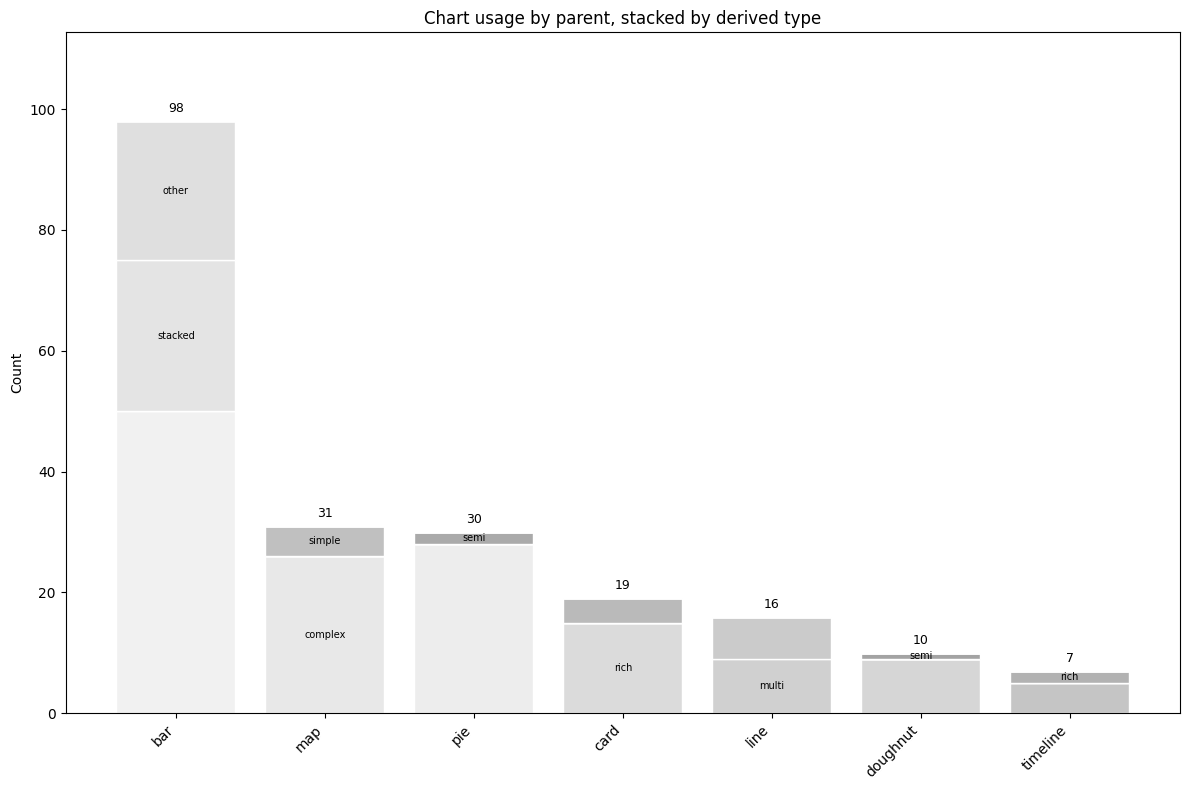

In [28]:
import numpy as np
import matplotlib as mpl

def simple_reduce(derived, parent):
    d = derived.lower().strip()
    p = parent.lower().strip()

    # remove the parent name wherever it appears
    d = d.replace(p, "").strip()

    # remove separators left behind
    d = d.replace("_", "").replace("-", "").strip()

    return d


# === BUILD: parent (original chart_type) vs derived (your display_label) ===
# We'll only use CHART rows, and keep the original, normalized parent type.
parent = ws.loc[m_chart, "chart_type"].copy()                # parent category
derived = display_label.copy()                                # derived sub-type used as stacks

# Make a pivot table of counts: rows=parent, cols=derived
pivot = (
    pd.crosstab(parent, derived)
      .sort_index()  # initial deterministic order
)

# ---------------------------------------------------------
# NEW: Filter out parents that are just "simple" (or single-type)
# ---------------------------------------------------------
# We count how many columns have a count > 0 for each parent
types_per_parent = (pivot > 0).sum(axis=1)

# Keep only rows where the count of types is strictly greater than 1
pivot = pivot.loc[types_per_parent > 1]
# ---------------------------------------------------------

# --- Optional: reorder rows by total frequency ---
row_totals = pivot.sum(axis=1).sort_values(ascending=False)

# If you want to drop parents that have zero derived labels (shouldn't happen, but safe):
pivot = pivot.loc[pivot.sum(axis=1) > 0]

# --- Optional: reorder rows by total frequency (largest on top of the chart) ---
row_totals = pivot.sum(axis=1).sort_values(ascending=False)
pivot = pivot.loc[row_totals.index]

# --- Optional: reorder columns (stacks) by global frequency for a consistent legend order ---
col_totals = pivot.sum(axis=0).sort_values(ascending=False)
pivot = pivot[col_totals.index]

# === PLOT: stacked horizontal bars per parent ===
os.makedirs("imgs", exist_ok=True)

fig, ax = plt.subplots(figsize=(12, 8))

# We’ll draw stacks column-by-column using cumulative left offsets.
x_positions = range(len(pivot.index)) # Categories are now on X-axis
bottom = pd.Series([0]*len(pivot.index), index=pivot.index)  # running offset per row

# Choose a deterministic list of labels for the legend
stack_labels = list(pivot.columns)

def gray_palette(n):
    # From near-black to near-white, perceptually spaced
    base = ['#111111', '#2b2b2b', '#444444', '#5e5e5e',
            '#777777', '#919191', '#ababab', '#c5c5c5', '#dddddd', '#f0f0f0']
    if n <= len(base):
        return base[:n]
    # If you need more than 10, fall back to the colormap with wide range
    cmap = mpl.cm.get_cmap('Greys')
    # 0=black, 1=white; keep a wide span for contrast
    return [mpl.colors.to_hex(cmap(v)) for v in np.linspace(0.12, 0.92, n)]

num_stacks = len(stack_labels)
gray_colors = gray_palette(num_stacks)

for col, color in zip(stack_labels, gray_colors):
    values = pivot[col].values
    ax.bar(
        pivot.index,
        values,
        bottom=bottom[pivot.index].values,
        label=col,
        color=color,
        edgecolor="white"
    )
    bottom[pivot.index] = bottom[pivot.index] + pivot[col]


# Add value labels for each segment (only if non-zero)
# (Keeps the chart readable for moderate-sized datasets.)
# --- Label segments with derived-type name ONLY when the bar is truly stacked ---

# Precompute how many derived sub-types each parent has
segments_per_parent = (pivot > 0).sum(axis=1)

for i, parent_label in enumerate(pivot.index):

    # skip non-stacked bars
    if segments_per_parent[parent_label] <= 1:
        continue

    cumulative = 0
    for col in stack_labels:
        v = pivot.loc[parent_label, col]
        if v > 0:
            short = simple_reduce(col, parent_label)

            # only draw if something remains
            if short:
                ax.text(
                    i,
                    cumulative + v/2,
                    short,
                    ha="center",
                    va="center",
                    fontsize=7
                )

            cumulative += v


# Add total labels at the right side of each bar
totals = pivot.sum(axis=1)
y_pad = max(totals.max() * 0.01, 0.5)
max_total = totals.max()
ax.set_ylim(0, max_total * 1.15)
for x, total in enumerate(totals.values):
    ax.text(x, total + y_pad, str(total), va="bottom", ha="center", fontsize=9)

ax.set_title("Chart usage by parent, stacked by derived type")
ax.set_ylabel("Count")
ax.set_xlabel("")
# ax.invert_yaxis()  # most frequent at the top (since we sorted ascending above)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("imgs/chart_usage_parent_stacked_by_derived.png", dpi=150)
plt.show()


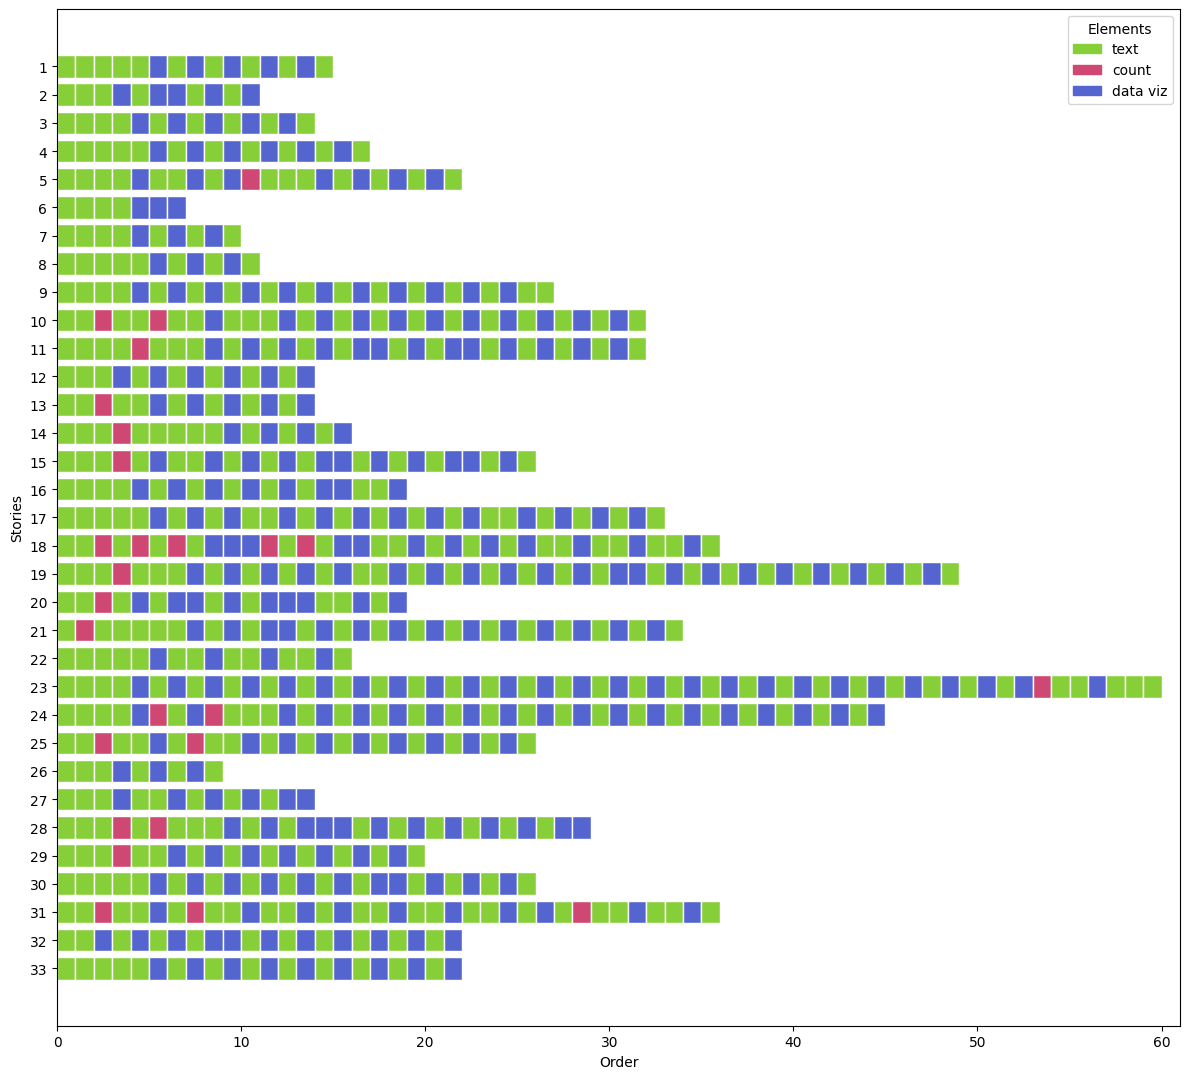

In [30]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd

ws = pd.read_csv('website_structure_with_interactions.csv', encoding='utf-8-sig')

def row_to_elements(row):
    t = str(row.get('type', '')).strip().lower()
    role = str(row.get('role', '')).strip().lower()
    has_chart = pd.notna(row.get('chart_type')) and str(row.get('chart_type')).strip() != ''
    has_content = pd.notna(row.get('content')) and str(row.get('content')).strip() != ''
    elements = []
    # If role indicates counting, add a 'count' element
    if 'count' in role:
        elements.append('count')
    # If it's a chart section: add 'data viz', and if there is text content too, add 'text' before it
    if has_chart:
        if has_content:
            elements.append('text')
        elements.append('data viz')
    else:
        # Pure text blocks (or any row with non-empty content but no chart)
        if t == 'text' or has_content:
            elements.append('text')
    return elements

# Build ordered element sequences per record_index
seq_rows = []
for rid, grp in ws.groupby('record_index', sort=False):
    for _, r in grp.iterrows():
        elems = row_to_elements(r)
        for e in elems:
            seq_rows.append({'record_index': rid, 'element': e})
seq = pd.DataFrame(seq_rows)
if seq.empty:
    print('No elements detected to plot.')
else:
    seq['order'] = seq.groupby('record_index').cumcount() + 1
    palette = {'text':'#87cf38','count':'#cf4773','data viz':'#5565cf'}
    used_elems = [e for e in palette if e in set(seq['element'])]
    groups = list(seq.groupby('record_index', sort=False))
    fig, ax = plt.subplots(figsize=(12, 0.3 * len(groups) + 1))
    for y, (rid, s) in enumerate(groups):
        for _, rr in s.iterrows():
            ax.barh(y, 1, left=int(rr['order'])-1, color=palette[rr['element']], edgecolor='white', height=0.8)
    ax.set_yticks(range(len(groups)))
    ax.set_yticklabels([str(rid) for rid, _ in groups])
    ax.set_xlabel('Order')
    ax.set_ylabel('Stories')
    ax.invert_yaxis()
    ax.set_xlim(0, int(seq['order'].max()) + 1)
    handles = [mpatches.Patch(color=palette[k], label=k) for k in used_elems]
    if handles:
        ax.legend(handles=handles, title='Elements', loc='upper right')
    plt.tight_layout()
    # Save and show the chart
    plt.savefig('imgs/ordering.png')


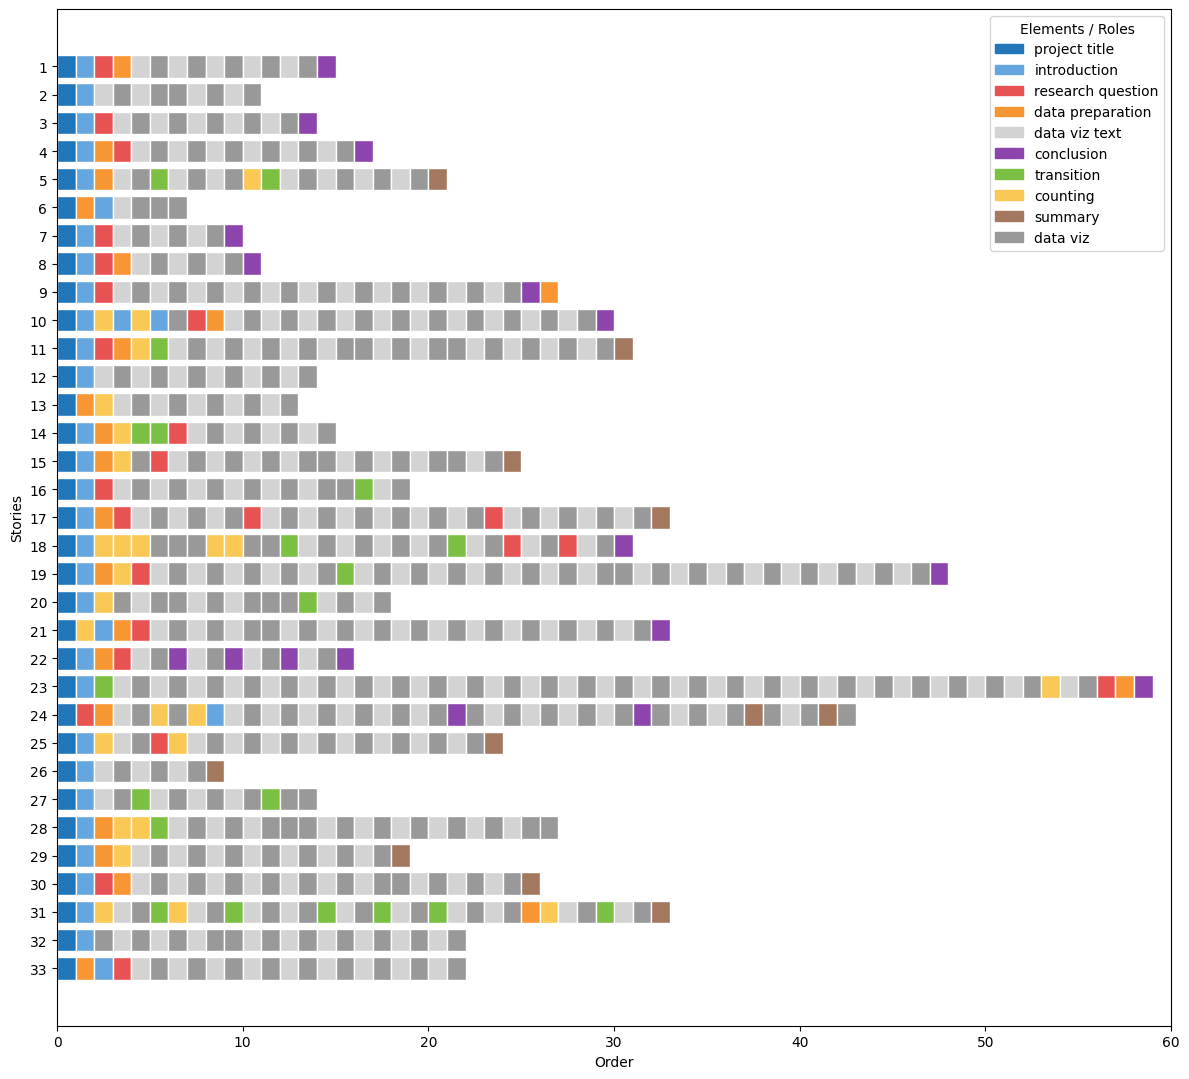

In [24]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
import pandas as pd

# Use existing ws if available, otherwise read the enriched CSV
try:
    ws
except NameError:
    ws = pd.read_csv('website_structure_with_interactions.csv', encoding='utf-8-sig')

CHART_CONTENT_LABEL = 'data viz text'  # <--- label we assign to chart text with NaN role

def row_to_elements(row):
    """
    Convert a row into (element, role) pairs:
      - ('text', <role_from_role_col>) for rows where type == 'text'
      - ('text', CHART_CONTENT_LABEL) for chart_section text content (role is NaN by design)
      - ('data viz', None) for the visualization block
    """
    t = str(row.get('type', '') or '').strip().lower()
    role_raw = str(row.get('role', '') or '').strip().lower()
    has_chart = pd.notna(row.get('chart_type')) and str(row.get('chart_type')).strip() != ''
    has_content = pd.notna(row.get('content')) and str(row.get('content')).strip() != ''

    elements = []

    if t == 'text':
        # Text rows: use the provided role (fallback to a neutral label if empty)
        role = role_raw if role_raw else 'text_unlabeled'
        elements.append(('text', role))

    elif t == 'chart_section':
        # Chart rows:
        # 1) If there is text content tied to the chart, label it as chart_content
        if has_content:
            elements.append(('text', CHART_CONTENT_LABEL))
        # 2) Then the chart block itself
        if has_chart:
            elements.append(('data viz', None))

    else:
        # Any other row type with content but no chart -> treat as text (rare)
        if has_content and not has_chart:
            role = role_raw if role_raw else 'text_unlabeled'
            elements.append(('text', role))
        elif has_chart:
            if has_content:
                elements.append(('text', CHART_CONTENT_LABEL))
            elements.append(('data viz', None))

    return elements


# Build ordered element sequences per record_index
seq_rows = []
for rid, grp in ws.groupby('record_index', sort=False):
    for _, r in grp.iterrows():
        for e, role in row_to_elements(r):
            seq_rows.append({'record_index': rid, 'element': e, 'role': role})

seq = pd.DataFrame(seq_rows)

if seq.empty:
    print('No elements detected to plot.')
else:
    seq['order'] = seq.groupby('record_index').cumcount() + 1

    # --- Palette setup ---
    palette = {'data viz': '#999999'}  # fixed gray for charts

    # Your hand-picked role colors (add/edit as needed)
    role_colors = {
        'project title': '#2076B9',
        'introduction': '#65A6DE',
        'research question': '#E75252',
        'data preparation': '#F79632',
        'counting': '#F9C855',
        'transition': '#7BC043',
        'conclusion': '#8E44AD',
        'summary': '#A3785E',
        CHART_CONTENT_LABEL: '#D3D3D3',  # <--- color for chart-related text content (role was NaN)
    }

    def color_for_row(row):
        if row['element'] == 'data viz':
            return palette['data viz']
        return role_colors.get(row['role'], '#999999')

    # --- Plot ---
    groups = list(seq.groupby('record_index', sort=False))
    fig, ax = plt.subplots(figsize=(12, 0.3 * len(groups) + 1))

    for y, (rid, s) in enumerate(groups):
        for _, rr in s.iterrows():
            ax.barh(
                y,
                1,
                left=int(rr['order']) - 1,
                color=color_for_row(rr),
                edgecolor='white',
                height=0.8
            )

    ax.set_yticks(range(len(groups)))
    ax.set_yticklabels([str(rid) for rid, _ in groups])
    ax.set_xlabel('Order')
    ax.set_ylabel('Stories')
    ax.invert_yaxis()
    ax.set_xlim(0, int(seq['order'].max()) + 1)

    # Legend: roles actually used + 'data viz'
    used_roles = list(dict.fromkeys(seq.loc[seq['element'] == 'text', 'role']))
    handles = [mpatches.Patch(color=role_colors.get(r, '#999999'), label=r) for r in used_roles]
    handles.append(mpatches.Patch(color=palette['data viz'], label='data viz'))

    ax.legend(handles=handles, title='Elements / Roles', loc='upper right', ncol=1)
    plt.tight_layout()
    # Save and show the chart
    plt.savefig('imgs/ordering_text_roles.png')
    plt.show()


## RQ1 - How do visualization practices reveal the underlying quality of digital library data?

Examine whether the complexity and variety of charts used in data stories correlate with indicators of dataset richness (i.e. integration)

- H1.1: Stories employing complex visualizations (TODO define complex) are based on integrated data
- H1.2: Simpler visualizations (single bar or line charts) are associated with limited datatsets

In [27]:
# chart type x interaction level

# Use existing ws if available, otherwise read the enriched CSV
try:
    ws
except NameError:
    ws = pd.read_csv('website_structure_with_interactions.csv', encoding='utf-8-sig')

# Filter only rows that actually represent charts (non-null chart_type)
charts_df = ws[ws["chart_type"].notna()].copy()

# Count number of data sources per chart
# Split data_source by ';' and count items
num_sources = []
for value in charts_df["data_source"]:
    if pd.isna(value):
        print('Missing')
    parts = value.split(";")
    cleaned = []
    for part in parts:
        stripped = part.strip()
        if stripped:
            cleaned.append(stripped)
    num_sources.append(len(cleaned))

charts_df["num_data_sources"] = num_sources

# Keep only the relevant columns for analysis
chart_analysis_df = charts_df[[
    "website", "chart_type", "interaction_level", "num_data_sources"
]]



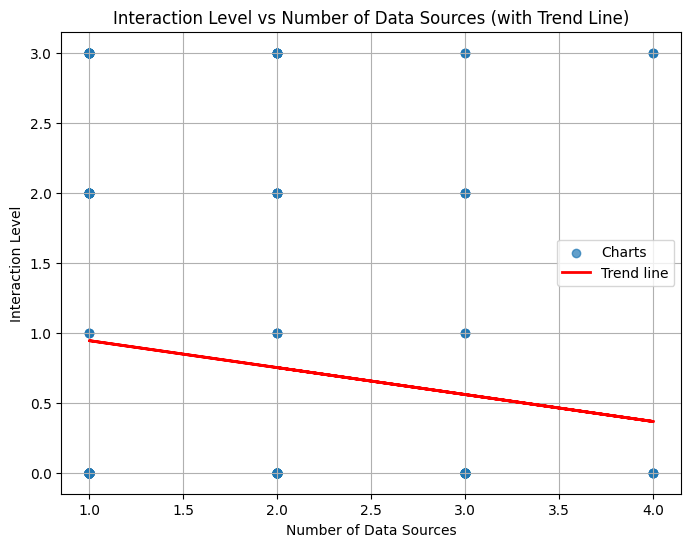

Pearson r   = -0.138 (p=0.01671987440725165)
Spearman ρ  = -0.138 (p=0.016170555168287422)
Kendall τ   = -0.126 (p=0.015544505804999838)


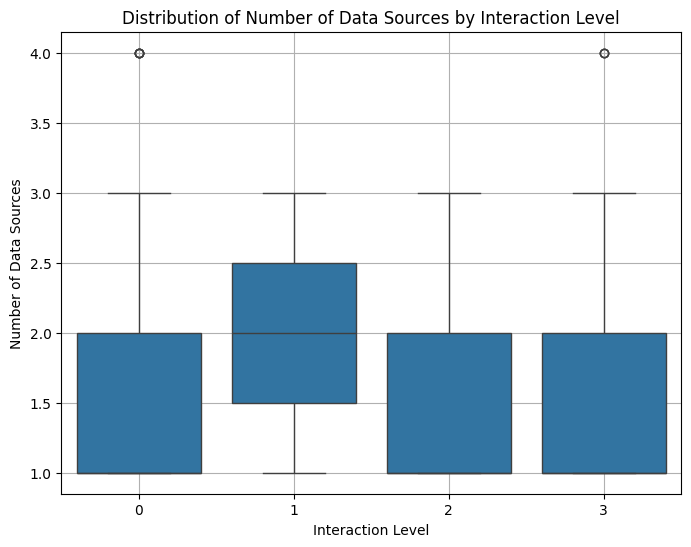

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, kendalltau
import numpy as np

# --- 1. Scatter plot ---
plt.figure(figsize=(8, 6))

# Scatter points
plt.scatter(
    chart_analysis_df["num_data_sources"], 
    chart_analysis_df["interaction_level"], 
    alpha=0.7, label="Charts"
)

# Compute and plot regression line (linear fit)
x = chart_analysis_df["num_data_sources"]
y = chart_analysis_df["interaction_level"]
m, b = np.polyfit(x, y, 1)  # linear regression (slope, intercept)
plt.plot(x, m*x + b, color="red", linewidth=2, label="Trend line")

# Labels and aesthetics
plt.title("Interaction Level vs Number of Data Sources (with Trend Line)")
plt.xlabel("Number of Data Sources")
plt.ylabel("Interaction Level")
plt.grid(True)
plt.legend()
# Save and show the chart
plt.savefig('imgs/scatter_intereaction_data_source.png')
plt.show()
# --- 2. Correlation analysis ---
# Compute Pearson and Spearman correlations
pearson_corr, pearson_p = pearsonr(
    chart_analysis_df["num_data_sources"], chart_analysis_df["interaction_level"]
)
spearman_corr, spearman_p = spearmanr(
    chart_analysis_df["num_data_sources"], chart_analysis_df["interaction_level"]
)

kendall_corr, kendall_p = kendalltau(
    chart_analysis_df["num_data_sources"], chart_analysis_df["interaction_level"]
)


# Return correlation results
print(f"Pearson r   = {pearson_corr:.3f} (p={pearson_p})")
print(f"Spearman ρ  = {spearman_corr:.3f} (p={spearman_p})")
print(f"Kendall τ   = {kendall_corr:.3f} (p={kendall_p})")

# --- 3. Boxplot ---
plt.figure(figsize=(8, 6))
sns.boxplot(data=chart_analysis_df, x="interaction_level", y="num_data_sources")
plt.title("Distribution of Number of Data Sources by Interaction Level")
plt.xlabel("Interaction Level")
plt.ylabel("Number of Data Sources")
plt.grid(True)
# Save and show the chart
plt.savefig('imgs/dis_interaction_data_source.png')
plt.show()


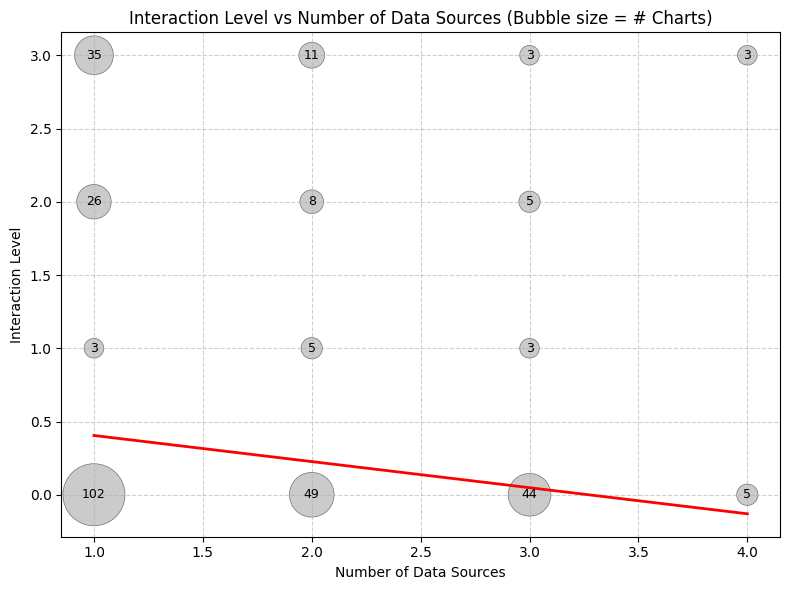

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# --- Bubble chart: Interaction Level vs Number of Data Sources ---
agg = (
    chart_analysis_df
      .assign(
          num_data_sources=lambda d: pd.to_numeric(d['num_data_sources'], errors='coerce'),
          interaction_level=lambda d: pd.to_numeric(d['interaction_level'], errors='coerce')
      )
      .dropna(subset=['num_data_sources', 'interaction_level'])
      .groupby(['num_data_sources', 'interaction_level'], as_index=False)
      .agg(n_charts=('num_data_sources', 'size'))  # <-- count charts
)

# Map counts to bubble sizes
min_size, max_size = 200, 2000
if agg['n_charts'].max() == agg['n_charts'].min():
    sizes = np.full(len(agg), 600)
else:
    sizes = min_size + (agg['n_charts'] - agg['n_charts'].min()) / \
            (agg['n_charts'].max() - agg['n_charts'].min()) * (max_size - min_size)

# --- Plot ---
plt.figure(figsize=(8, 6))
plt.scatter(
    agg['num_data_sources'],
    agg['interaction_level'],
    s=sizes,
    alpha=0.5,
    edgecolors='black',
    linewidths=0.5,
    color='#999999'
)

# Add the number of charts inside each bubble
for _, row in agg.iterrows():
    plt.text(
        row['num_data_sources'],
        row['interaction_level'],
        str(int(row['n_charts'])),
        ha='center', va='center',
        fontsize=9
    )

# Weighted trend line (weighted by number of charts)
x = agg['num_data_sources'].to_numpy()
y = agg['interaction_level'].to_numpy()
w = agg['n_charts'].to_numpy()
try:
    m, b = np.polyfit(x, y, 1, w=w)
except TypeError:
    reps = np.clip(w.astype(int), 1, 100)
    x_rep = np.repeat(x, reps)
    y_rep = np.repeat(y, reps)
    m, b = np.polyfit(x_rep, y_rep, 1)

x_line = np.linspace(x.min(), x.max(), 100)
plt.plot(x_line, m*x_line + b, color='red', linewidth=2)

plt.title("Interaction Level vs Number of Data Sources (Bubble size = # Charts)")
plt.xlabel("Number of Data Sources")
plt.ylabel("Interaction Level")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
# Save and show the chart
plt.savefig('imgs/bubble_intereaction_data_source.png')
plt.show()


In [26]:
import statsmodels.api as sm

x = agg["num_data_sources"]
y = agg["interaction_level"]
w = agg["n_charts"]

# Add constant for intercept
X = sm.add_constant(x)
model = sm.WLS(y, X, weights=w).fit()

print(model.summary())


                            WLS Regression Results                            
Dep. Variable:      interaction_level   R-squared:                       0.020
Model:                            WLS   Adj. R-squared:                 -0.046
Method:                 Least Squares   F-statistic:                    0.2998
Date:                Mon, 24 Nov 2025   Prob (F-statistic):              0.592
Time:                        15:36:02   Log-Likelihood:                -34.158
No. Observations:                  17   AIC:                             72.32
Df Residuals:                      15   BIC:                             73.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.1253      0.651  

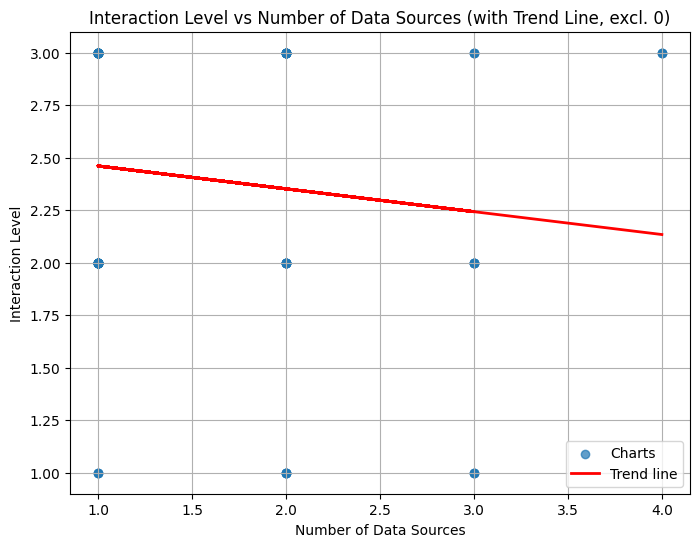

Pearson r   = -0.129 (p=0.19657325817580348)
Spearman ρ  = -0.147 (p=0.13971744215071247)
Kendall τ   = -0.136 (p=0.1380357345836372)


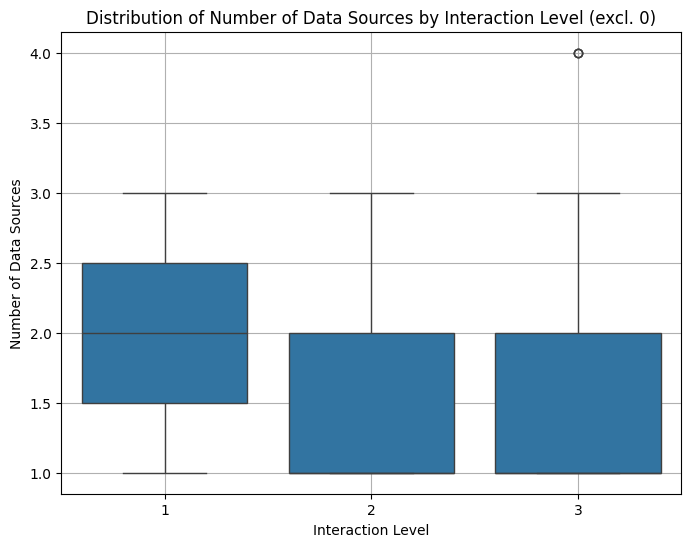

In [48]:
filtered_df = chart_analysis_df[chart_analysis_df["interaction_level"] != 0]
# --- 1. Scatter plot ---
plt.figure(figsize=(8, 6))

# Scatter points
plt.scatter(
    filtered_df["num_data_sources"], 
    filtered_df["interaction_level"], 
    alpha=0.7, label="Charts"
)

# Compute and plot regression line (linear fit)
x = filtered_df["num_data_sources"]
y = filtered_df["interaction_level"]
m, b = np.polyfit(x, y, 1)  # linear regression (slope, intercept)
plt.plot(x, m*x + b, color="red", linewidth=2, label="Trend line")

# Labels and aesthetics
plt.title("Interaction Level vs Number of Data Sources (with Trend Line, excl. 0)")
plt.xlabel("Number of Data Sources")
plt.ylabel("Interaction Level")
plt.grid(True)
plt.legend()
# Save and show the chart
plt.savefig('imgs/scatter_intereaction_data_source.png')
plt.show()
# --- 2. Correlation analysis ---
# Compute Pearson and Spearman correlations
pearson_corr, pearson_p = pearsonr(
    filtered_df["num_data_sources"], filtered_df["interaction_level"]
)
spearman_corr, spearman_p = spearmanr(
    filtered_df["num_data_sources"], filtered_df["interaction_level"]
)

kendall_corr, kendall_p = kendalltau(
    filtered_df["num_data_sources"], filtered_df["interaction_level"]
)


# Return correlation results
print(f"Pearson r   = {pearson_corr:.3f} (p={pearson_p})")
print(f"Spearman ρ  = {spearman_corr:.3f} (p={spearman_p})")
print(f"Kendall τ   = {kendall_corr:.3f} (p={kendall_p})")

# --- 3. Boxplot ---
plt.figure(figsize=(8, 6))
sns.boxplot(data=filtered_df, x="interaction_level", y="num_data_sources")
plt.title("Distribution of Number of Data Sources by Interaction Level (excl. 0)")
plt.xlabel("Interaction Level")
plt.ylabel("Number of Data Sources")
plt.grid(True)
# Save and show the chart
plt.savefig('imgs/dis_interaction_data_source_ecl0.png')
plt.show()

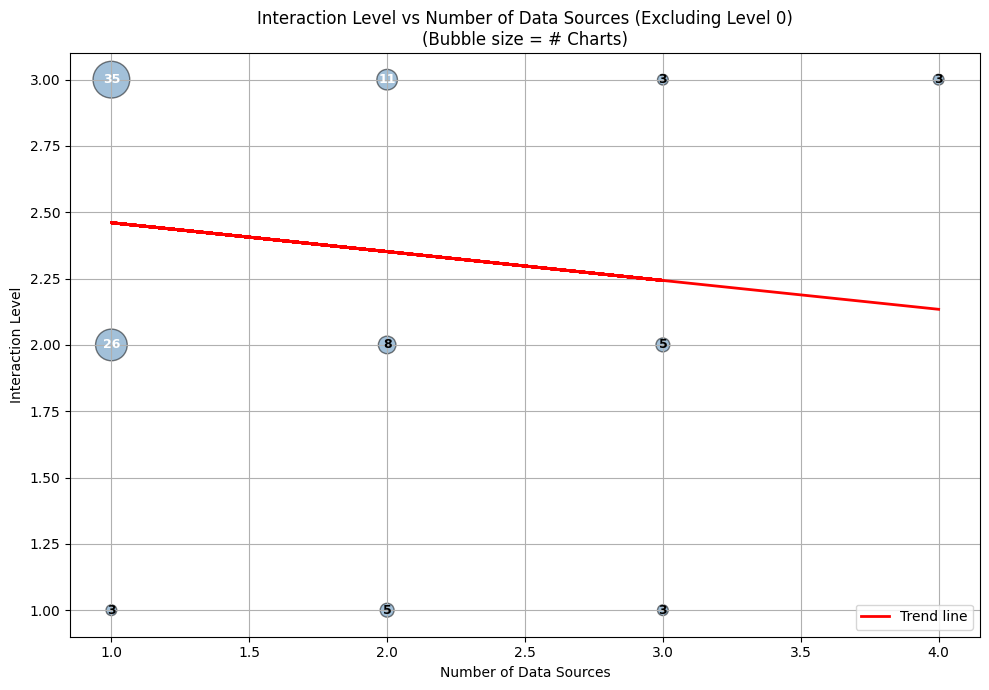

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# --- Filter out charts with interaction_level == 0 ---
filtered_df = chart_analysis_df[chart_analysis_df["interaction_level"] != 0]

# --- Prepare data for aggregation ---
grouped = (
    filtered_df.groupby(["num_data_sources", "interaction_level"])
    .size()
    .reset_index(name="count")
)

# --- Create the bubble chart ---
plt.figure(figsize=(10, 7))

# Scatter with bubble sizes proportional to count
plt.scatter(
    grouped["num_data_sources"],
    grouped["interaction_level"],
    s=grouped["count"] * 20,  # adjust scaling if needed
    alpha=0.5,
    color="steelblue",
    edgecolor="black",
)

# Add labels inside bubbles
for _, row in grouped.iterrows():
    plt.text(
        row["num_data_sources"],
        row["interaction_level"],
        str(row["count"]),
        ha="center",
        va="center",
        fontsize=9,
        color="white" if row["count"] > 10 else "black",
        fontweight="bold"
    )

# --- Regression line (same approach) ---
x = filtered_df["num_data_sources"]
y = filtered_df["interaction_level"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color="red", linewidth=2, label="Trend line")

# --- Chart labels and aesthetics ---
plt.title("Interaction Level vs Number of Data Sources (Excluding Level 0)\n(Bubble size = # Charts)")
plt.xlabel("Number of Data Sources")
plt.ylabel("Interaction Level")
plt.grid(True)
plt.legend()
plt.tight_layout()

# --- Save and show ---
plt.savefig('imgs/scatter_interaction_data_source_excl0.png')
plt.show()


# Creator Complexity Index (CCI)

## 1. Purpose
The **Creator Complexity Index (CCI)** quantifies the **authoring effort** required to produce data visualizations within a data story.  
Whereas traditional measures focus on *viewer-side* complexity (e.g., visual clutter or interpretive difficulty), CCI captures the **constructive complexity** — the cognitive, technical, and editorial work performed by the creator.

---

## 2. Conceptual Background
CCI adapts insights from two key sources:

- [**Lin et al. (2025)**](https://doi.org/10.1145/3706599.3719983) model *perceived* visual complexity using features such as chart types, visual encodings, and annotations.  
- [**Cavaller (2021)**](https://doi.org/10.3389/frma.2021.643533) proposes a *dimensional taxonomy* of visualization complexity, progressing from *Basic* to *Integrative* layers that reflect increasing organizational and design effort.

Our adaptation shifts the focus from **viewer** to **creator**, treating complexity as the cumulative effort required to configure encodings, integrate features, annotate charts, and embed them within a narrative.

---

## 3. Data Model
Only components where `type == "chart section"` are analyzed. Relevant fields:

| Field | Description |
|-------|-------------|
| `record_index` | Story/project identifier |
| `chart_type` | Base visualization type (e.g., bar, map, network) |
| `chart_feature` | Semicolon-separated list of features and interactions |
| `chart_annotations` | Textual annotations associated with the chart |
| `content` | Narrative or explanatory text linked to the chart |
| `repetition` | Whether the chart reuses an existing configuration |
| `data_source` | List of data sources used in the visualization |

`data_source` is **not included** in the complexity formula (to enable independent correlation analysis).

---

## 4. Operationalization
CCI is an **additive measure** defined as:
`CCI = (base_type + feature_score + text_effort) × repetition_multiplier`

### **4.1 Base score (`base_type`)**
Each `chart_type` is assigned a base difficulty between **1.0 and 4.0**, reflecting the design and configuration effort (e.g., bar = 1.0, map = 3.5, network = 3.5, globe = 4.0).

### **4.2 Feature increments (`feature_score`)**
Each element in `chart_feature` contributes **1–3** points:
- **1** = minor visual element or style option  
- **2** = additional encoding or basic interaction  
- **3** = high-effort interaction or narrative orchestration  

These weights model the incremental authoring effort required to configure interactions, advanced encodings, nested views, pop-ups, animations, scrollytelling, etc.

### **4.3 Textual effort (`text_effort`)**
To account for interpretive or editorial work:
`text_effort = 0.1 × ln(1 + number_of_characters_in(annotations + content))`
This uses log-scaling to reflect diminishing returns for very long/short text.

### **4.4 Repetition penalty (`repetition_multiplier`)**
If a chart reuses a previously defined template:
`repetition_multiplier = 0.7`
Otherwise: 
`repetition_multiplier = 1.0`
Repetition lowers complexity to reflect reuse of prior work.

### **4.5 Excluded: number of data sources**
To avoid conflating data integration with authoring effort, **no statistical boost is added for multiple `data_source`s**.  
Instead, the number of data sources is computed separately (`n_data_sources`) and analyzed independently (e.g., correlation with CCI).

---

## 5. Implementation Summary

```cci = (base_type + feature_score + text_effort) * repetition_multiplier```

Outputs:
- **Chart-level dataset**:
  - `creator_complexity`
  - `n_data_sources` (for correlation, not used in the formula)
- **Project-level aggregates (grouped by record_index)**:
  - mean and sum of `creator_complexity`
  - number of charts
  - average data sources per chart

## 6. Interpretation
**Low CCI (~1–2)**
Basic charts with minimal configuration (bar, pie, simple line).

**Medium CCI (~3–6)**
Charts with additional encodings or annotations (multibar, timelines, scatterplots).

**High CCI (>6)**
Interactive, structural, or narrative visualizations (maps with filters, scrollytelling, pop-ups, animations).

## 7. Analytical Uses
CCI enables the study of:
- Differences in visual authoring strategies across projects
- Correlations with number of data sources, textual density, or student SPARQL proficiency
- Pedagogical insights into where students invest most effort
- Structural differences between simpler and more advanced data stories

## 8. Validation and Limitations

- The metric is heuristic: weights are expert-assigned.
- It is suitable for relative comparison within the dataset, not as an absolute measure of difficulty.
- Initial analyses show no strong correlation between number of data sources and complexity, suggesting that authoring effort is driven more by visual and interaction design than by data integration.

In [74]:
from pathlib import Path
import math

df = pd.read_csv('website_structure_with_interactions_derived.csv', encoding='utf-8') # or 'utf-8-sig'
charts = df[df["type"] == "chart section"].copy()

CHART_TYPE = {

    # === T1 — Non-analytic / decorative ===
    'palette': 2,

    # === T2 — Simple analytic ===
    'table': 4,
    'card': 4,
    'pie': 4,
    'doughnut': 4,
    'semi-pie': 4,
    'semi-doughnut': 4,
    'bar': 4,
    'wordcloud': 4,

    # === T3 — Moderate analytic ===
    'area': 6,
    'line': 6, 
    'dot': 6,
    'pictogram': 6,
    'scatter': 6,
    'bubble': 6,
    'dumbell': 6,
    'radar': 6,

    # promoted variants
    'multiline line': 6,
    'grouped bar': 6,
    'radial bar': 6,
    'diverging bar': 6,
    'map_simple': 6,

    # === T4 — Structured / hierarchical / temporal ===
    'stacked bar': 8,
    'timeline': 8,
    'heatmap': 8,
    'matrix': 8,
    'treemap': 8,
    'gantt': 8,
    'hemicycle': 8,
    'chart-report': 8,

    # === T5 — High structural / relational / rich ===
    'network': 10,
    'chord': 10,
    'sankey': 10,
    'map_complex': 10,
    'timeline_rich': 10,

    # special case: richer than a card but not analytic
    'card_rich': 6
}


FEATURE_WEIGHT_EXTRA = {
    "comparison": 1.5,
    "trendline": 1.5,
    "correlation": 2.0
}


# === COMPUTE CCI ===
ccis = []
n_sources = []

for _, row in charts.iterrows():
    # --- base type (use derived if available) ---
    derived = str(row.get("chart_type_derived", "")).strip().lower()
    fallback = str(row.get("chart_type", "")).strip().lower()
    chart_key = derived if derived else fallback
    if chart_key in CHART_TYPE:
        base = CHART_TYPE[chart_key]
    else:
        print(f"[WARN] Unknown chart type: {chart_key}")
        base = None

    # --- design features (comparison / trendline / correlation, etc.) ---
    feat_str = str(row.get("chart_design_feature", "")).strip().lower()
    feat_tokens = {t.strip() for t in feat_str.split(";") if t.strip()}
    feature_score = sum(FEATURE_WEIGHT_EXTRA.get(t, 0) for t in feat_tokens)

    # --- interaction level (already computed elsewhere) ---
    inter = row.get("interaction_level", 0)
    try:
        inter = float(inter)
    except Exception:
        inter = 0.0

    # --- annotations: binary bump if present ---
    ann = str(row.get("chart_annotations", "")).strip()
    ann_bonus = 0.5 if len(ann) > 0 else 0.0  # +0.5 if any annotation text

    # --- repetition penalty ---
    repetition = str(row.get("repetition", "")).strip().lower()
    multiplier = 0.7 if repetition == "yes" else 1.0

    # --- final complexity ---
    cci = (base + feature_score + inter + ann_bonus) * multiplier
    ccis.append(cci)

    # --- number of data sources (for correlation only) ---
    ds = str(row.get("data_source", "")).strip()
    n_ds = len([s for s in ds.split(";") if s.strip()]) if ds else 0
    n_sources.append(n_ds)

charts["creator_complexity"] = ccis
charts["n_data_sources"] = n_sources

# === SAVE CHART-LEVEL RESULTS ===
chart_out = "chart_complexity_no_datasource_boost.csv"
keep = [
    "record_index","website","type",
    "chart_type","chart_type_derived",
    "chart_design_feature","chart_interaction_feature","interaction_level",
    "repetition","chart_annotations","data_points","data_source",
    "n_data_sources","creator_complexity"
]
charts.loc[:, [c for c in keep if c in charts.columns]].to_csv(chart_out, index=False, encoding="utf-8-sig")
print(f"[✓] Saved chart-level file: {chart_out}")

# === AGGREGATE PER PROJECT ===
project_level = charts.groupby("record_index").agg(
    mean_creator_complexity=("creator_complexity","mean"),
    sum_creator_complexity=("creator_complexity","sum"),
    max_creator_complexity=("creator_complexity","max"),
    num_charts=("creator_complexity","size"),
    avg_n_data_sources=("n_data_sources","mean"),
    max_n_data_sources=("n_data_sources","max")
).reset_index()

proj_out = "project_complexity_no_datasource_boost.csv"
project_level.to_csv(proj_out, index=False, encoding="utf-8-sig")
print(f"[✓] Saved project-level file: {proj_out}")

# === QUICK SUMMARY ===
print("\n== Chart-level summary ==")
print(charts["creator_complexity"].describe())

print("\n== Project-level preview ==")
print(project_level.head())

# === OPTIONAL: quick correlation check ===
corr = charts[["creator_complexity","n_data_sources"]].corr().iloc[0,1]
print(f"\nCorrelation between CCI and number of data sources (chart-level): {corr:.3f}")


[✓] Saved chart-level file: chart_complexity_no_datasource_boost.csv
[✓] Saved project-level file: project_complexity_no_datasource_boost.csv

== Chart-level summary ==
count    302.000000
mean       6.990563
std        2.707263
min        2.500000
25%        4.550000
50%        6.500000
75%        8.500000
max       15.000000
Name: creator_complexity, dtype: float64

== Project-level preview ==
   record_index  mean_creator_complexity  sum_creator_complexity  \
0             1                 7.430000                   37.15   
1             2                 6.990000                   34.95   
2             3                 8.100000                   40.50   
3             4                 6.416667                   38.50   
4             5                 7.028571                   49.20   

   max_creator_complexity  num_charts  avg_n_data_sources  max_n_data_sources  
0                    12.5           5            2.000000                   2  
1                    13.5       

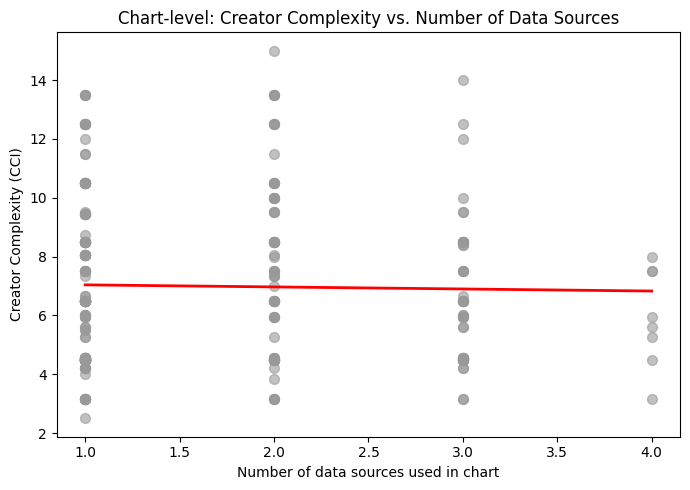

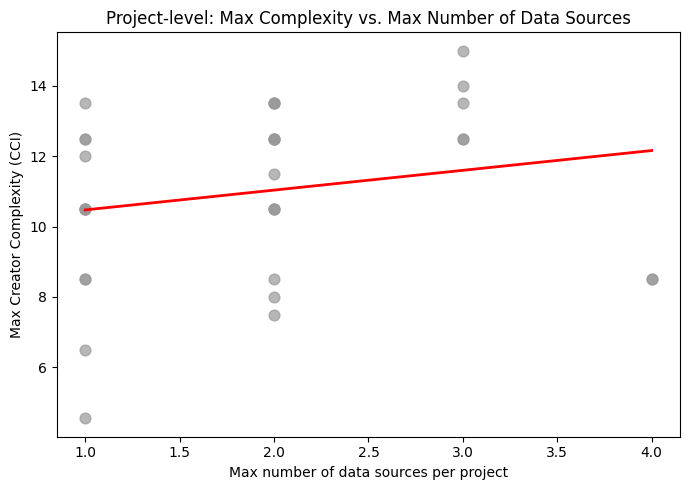

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# === Load the datasets === 
charts = pd.read_csv("chart_complexity_no_datasource_boost.csv") 
projects = pd.read_csv("project_complexity_no_datasource_boost.csv")

# === SCATTERPLOT (chart-level) ===
x = charts["n_data_sources"]
y = charts["creator_complexity"]

plt.figure(figsize=(7,5))
plt.scatter(x, y, alpha=0.6, s=50, color="#999999")

# Regression line
m, b = np.polyfit(x, y, 1)
x_line = np.linspace(x.min(), x.max(), 100)
plt.plot(x_line, m*x_line + b, linewidth=2, color="red")

plt.title("Chart-level: Creator Complexity vs. Number of Data Sources")
plt.xlabel("Number of data sources used in chart")
plt.ylabel("Creator Complexity (CCI)")
plt.tight_layout()
plt.show()


# === SCATTERPLOT (project-level) ===
x = projects["max_n_data_sources"]
y = projects["max_creator_complexity"]
# x = projects["avg_n_data_sources"]
# y = projects["mean_creator_complexity"]

plt.figure(figsize=(7,5))

# Scatter
plt.scatter(x, y, alpha=0.7, s=60, color="#999999")

# Regression line
m, b = np.polyfit(x, y, 1)
x_line = np.linspace(x.min(), x.max(), 100)
plt.plot(x_line, m*x_line + b, linewidth=2, color="red")
plt.savefig('imgs/scatter_cci_data_source.png')

plt.title("Project-level: Max Complexity vs. Max Number of Data Sources")
# plt.title("Project-level: Mean Complexity vs. Avg. Number of Data Sources")
plt.xlabel("Max number of data sources per project")
plt.ylabel("Max Creator Complexity (CCI)")
# plt.xlabel("Average number of data sources per project")
# plt.ylabel("Mean Creator Complexity (CCI)")
plt.tight_layout()
# Save and show
# plt.savefig('imgs/mean_scatter_project_cci_data_source.png')
plt.savefig('imgs/max_scatter_project_cci_data_source.png')
plt.show()


In [77]:
from scipy.stats import pearsonr, spearmanr, kendalltau

# === Chart-level correlations ===
x_chart = charts["n_data_sources"]
y_chart = charts["creator_complexity"]

pearson_chart, pearson_p = pearsonr(x_chart, y_chart)
spearman_chart, spearman_p = spearmanr(x_chart, y_chart)
kendall_chart, kendall_p = kendalltau(x_chart, y_chart)

print("=== Chart-level correlations ===")
print(f"Pearson r = {pearson_chart:.3f} (p={pearson_p:.3f})")
print(f"Spearman ρ = {spearman_chart:.3f} (p={spearman_p:.3f})")
print(f"Kendall τ = {kendall_chart:.3f} (p={kendall_p:.3f})")


# === Project-level correlations ===
x_proj = projects["avg_n_data_sources"]
y_proj = projects["max_creator_complexity"]

pearson_proj, pearson_proj_p = pearsonr(x_proj, y_proj)
spearman_proj, spearman_proj_p = spearmanr(x_proj, y_proj)
kendall_proj, kendall_proj_p = kendalltau(x_proj, y_proj)

print("\n=== Project-level correlations ===")
print(f"Pearson r   = {pearson_proj:.3f} (p={pearson_proj_p})")
print(f"Spearman ρ  = {spearman_proj:.3f} (p={spearman_proj_p})")
print(f"Kendall τ   = {kendall_proj:.3f} (p={kendall_proj_p})")




=== Chart-level correlations ===
Pearson r = -0.022 (p=0.700)
Spearman ρ = 0.022 (p=0.702)
Kendall τ = 0.016 (p=0.731)

=== Project-level correlations ===
Pearson r   = 0.247 (p=0.1652793369441548)
Spearman ρ  = 0.331 (p=0.05949080260572219)
Kendall τ   = 0.252 (p=0.0623128973436613)


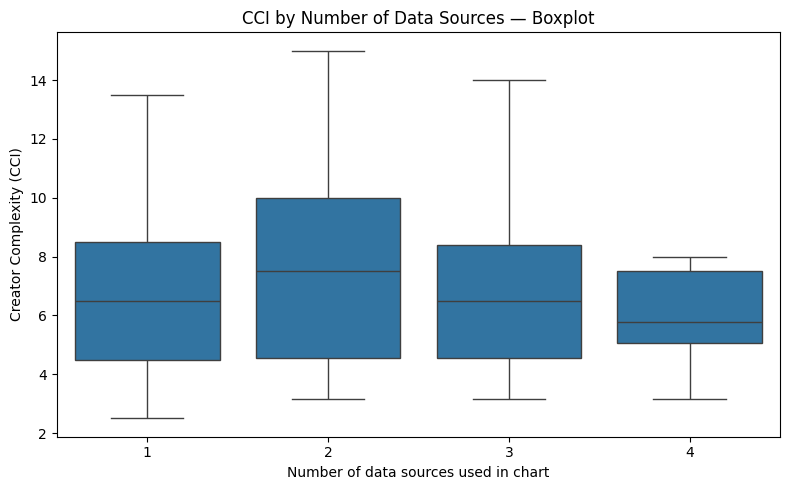

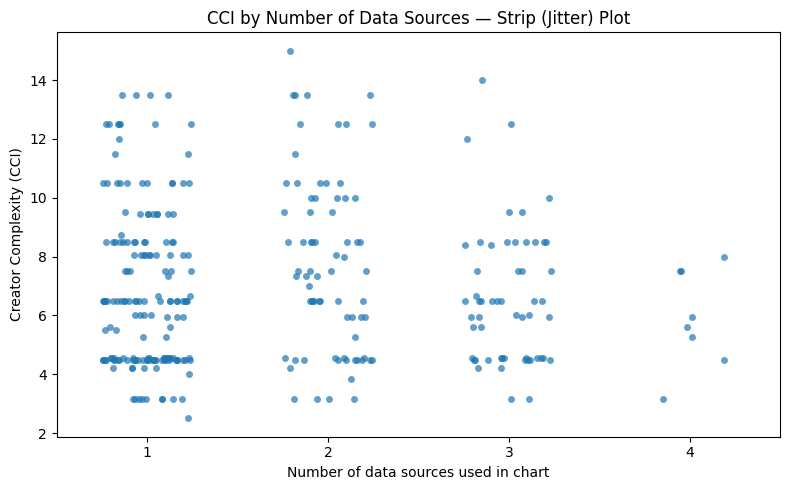

In [79]:
# --- Imports ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load chart-level file you saved earlier ---
df = pd.read_csv("chart_complexity_no_datasource_boost.csv", encoding="utf-8-sig")

# --- Keep only the needed columns and clean types ---
df = df[["n_data_sources", "creator_complexity"]].copy()
df["n_data_sources"] = pd.to_numeric(df["n_data_sources"], errors="coerce")
df["creator_complexity"] = pd.to_numeric(df["creator_complexity"], errors="coerce")
df = df.dropna(subset=["n_data_sources", "creator_complexity"])

# --- Ensure x-order is numeric and consistent (e.g., 1,2,3,4) ---
x_order = sorted(df["n_data_sources"].unique())

# -------------------------
# 1) BOX PLOT
# -------------------------
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df,
    x="n_data_sources",
    y="creator_complexity",
    order=x_order,
    whis=1.5,                # standard Tukey whiskers
    showfliers=True          # show outliers if any
)
plt.title("CCI by Number of Data Sources — Boxplot")
plt.xlabel("Number of data sources used in chart")
plt.ylabel("Creator Complexity (CCI)")
plt.tight_layout()
plt.savefig("imgs/cci_vs_sources_boxplot.png", dpi=150)
plt.show()

# -------------------------
# 2) STRIP (JITTER) PLOT
# -------------------------
plt.figure(figsize=(8, 5))
sns.stripplot(
    data=df,
    x="n_data_sources",
    y="creator_complexity",
    order=x_order,
    jitter=0.25,             # horizontal jitter to avoid overlap
    alpha=0.7
)
plt.title("CCI by Number of Data Sources — Strip (Jitter) Plot")
plt.xlabel("Number of data sources used in chart")
plt.ylabel("Creator Complexity (CCI)")
plt.tight_layout()
plt.savefig("imgs/cci_vs_sources_strip.png", dpi=150)
plt.show()



## RQ2 - What is the relationship between data integration and the exploratory or explanatory nature of data stories?

By analysing the combination of different visualization types and textual cues (such as a meaningful or not conclusion), we aim to distinguish exploratory (EDA) from knowledge-discovery (KD) narratives.

- H2.1: Stories that integrate multiple visualization types or combine heterogeneous datasets are more likely to pursue explanatory or inferential goals (KD).
- H2.2: Purely exploratory stories tend to rely on single-source data and simpler visual forms.

## RQ3 - What implications do these practices have for digital library policy and design?

We aim to extract empirical evidence to inform guidelines for data curation and service design.

- H3.1: The frequency and combination of certain visualization types (maps, networks) reveal recurring interoperability needs—namely, geocoding, entity linking, and persistent identifiers.
- H3.2: Enhancing these metadata and linkage services at the digital library level would directly increase the analytical and narrative depth of user-generated data stories.